### Import Libraries

In [1]:
# Generic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Training related Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [3]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns', 300)

### Reading and Understanding Data

In [4]:
#Reading the data into a dataframe from the csv
df_sh = pd.read_csv('train.csv', low_memory = False)

In [5]:
df_sh.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
df_sh.shape

(1460, 81)

In [7]:
df_sh.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [9]:
#Checking the number of missing values and its percentage
df_missing = df_sh.isnull().sum().sort_values(ascending = False)
df_missing_Perc = (100*df_sh.isnull().sum()/df_sh.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([df_missing,df_missing_Perc], axis=1, keys=['Missing_Count', 'Missing_Percentage'])
df_missing_values

Missing_Count  Missing_Percentage
PoolQC                  1453           99.520548
MiscFeature             1406           96.301370
Alley                   1369           93.767123
Fence                   1179           80.753425
FireplaceQu              690           47.260274
LotFrontage              259           17.739726
GarageYrBlt               81            5.547945
GarageCond                81            5.547945
GarageType                81            5.547945
GarageFinish              81            5.547945
GarageQual                81            5.547945
BsmtFinType2              38            2.602740
BsmtExposure              38            2.602740
BsmtQual                  37            2.534247
BsmtCond                  37            2.534247
BsmtFinType1              37            2.534247
MasVnrArea                 8            0.547945
MasVnrType                 8            0.547945
Electrical                 1            0.068493
Id                         0            0.000000
Functional                 0            0.000000
Fireplaces                 0            0.000000
KitchenQual                0            0.000000
KitchenAbvGr               0            0.000000
BedroomAbvGr               0            0.000000
HalfBath                   0            0.000000
FullBath                   0            0.000000
BsmtHalfBath               0            0.000000
TotRmsAbvGrd               0            0.000000
GarageCars                 0            0.000000
GrLivArea                  0            0.000000
GarageArea                 0            0.000000
PavedDrive                 0            0.000000
WoodDeckSF                 0            0.000000
OpenPorchSF                0            0.000000
EnclosedPorch              0            0.000000
3SsnPorch                  0            0.000000
ScreenPorch                0            0.000000
PoolArea                   0            0.000000
MiscVal                    0            0.000000
MoSold                     0            0.000000
YrSold                     0            0.000000
SaleType                   0            0.000000
SaleCondition              0            0.000000
BsmtFullBath               0            0.000000
HeatingQC                  0            0.000000
LowQualFinSF               0            0.000000
LandSlope                  0            0.000000
OverallQual                0            0.000000
HouseStyle                 0            0.000000
BldgType                   0            0.000000
Condition2                 0            0.000000
Condition1                 0            0.000000
Neighborhood               0            0.000000
LotConfig                  0            0.000000
YearBuilt                  0            0.000000
Utilities                  0            0.000000
LandContour                0            0.000000
LotShape                   0            0.000000
Street                     0            0.000000
LotArea                    0            0.000000
MSZoning                   0            0.000000
OverallCond                0            0.000000
YearRemodAdd               0            0.000000
2ndFlrSF                   0            0.000000
BsmtFinSF2                 0            0.000000
1stFlrSF                   0            0.000000
CentralAir                 0            0.000000
MSSubClass                 0            0.000000
Heating                    0            0.000000
TotalBsmtSF                0            0.000000
BsmtUnfSF                  0            0.000000
BsmtFinSF1                 0            0.000000
RoofStyle                  0            0.000000
Foundation                 0            0.000000
ExterCond                  0            0.000000
ExterQual                  0            0.000000
Exterior2nd                0            0.000000
Exterior1st                0            0.000000
RoofMatl                   0            0.000000
SalePrice                  0            0.0000

In [10]:
# Checking how many columns have null values
df_missing_values.loc[(df_missing_values["Missing_Percentage"] > 0)] 


Missing_Count  Missing_Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageYrBlt              81            5.547945
GarageCond               81            5.547945
GarageType               81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
BsmtFinType2             38            2.602740
BsmtExposure             38            2.602740
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtFinType1             37            2.534247
MasVnrArea                8            0.547945
MasVnrType                8            0.547945
Electrical                1            0.068493

#### Based on the above we can ignore cols more than 80% 
1. PoolQC
2. MiscFeature
3. Alley
4. Fence

In [11]:
# Checking unique values
df_sh.nunique().sort_values(ascending= False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
PoolArea            8
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
RoofStyle           6
Foundation

In [12]:
df_sh.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
ignore_cols = ["PoolQC","MiscFeature","Alley","Fence"]

In [14]:
df_sh.drop(columns=ignore_cols, inplace = True)
df_sh.shape

(1460, 77)

In [15]:
df_sh.isnull().sum().sort_values(ascending = False)

FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
KitchenQual        0
BsmtFullBath       0
GrLivArea          0
TotRmsAbvGrd       0
Functional         0
Id                 0
Fireplaces         0
ScreenPorch        0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
3SsnPorch          0
2ndFlrSF           0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
LowQualFinSF       0
Heating            0
1stFlrSF           0
OverallCond        0
MSZoning           0
LotArea      

In [16]:
# There are some year cols , we will calculate age based 
# on the same based on current year to use them purely as numerical variable

In [17]:
year_cols = ['GarageYrBlt','YearBuilt', 'YearRemodAdd', 'YrSold']

In [18]:
#Imputing null values to 0
df_sh["GarageYrBlt"] = df_sh["GarageYrBlt"].fillna(0)

In [19]:
df_sh['age_since_garage_built'] = (2024 - df_sh['GarageYrBlt'].apply(int))

In [20]:
df_sh['age_since_garage_built'].value_counts()/len(df_sh['age_since_garage_built'])*100

2024    5.547945
19      4.452055
18      4.041096
20      3.630137
21      3.424658
17      3.356164
47      2.397260
26      2.123288
25      2.054795
48      1.986301
16      1.986301
24      1.849315
56      1.780822
22      1.780822
74      1.643836
31      1.506849
66      1.438356
58      1.438356
15      1.438356
59      1.438356
62      1.438356
23      1.369863
54      1.369863
28      1.369863
67      1.369863
70      1.301370
27      1.301370
46      1.301370
64      1.301370
29      1.232877
30      1.232877
50      1.232877
60      1.232877
65      1.164384
34      1.095890
61      1.095890
68      1.095890
57      1.027397
55      1.027397
45      1.027397
44      1.027397
36      0.958904
84      0.958904
104     0.958904
52      0.958904
51      0.958904
63      0.890411
53      0.890411
32      0.890411
69      0.890411
71      0.821918
76      0.753425
37      0.753425
35      0.684932
99      0.684932
43      0.684932
39      0.684932
83      0.684932
85      0.6164

In [21]:
df_sh['age_since_garage_built'].replace({2024:0}, inplace=True)

In [22]:
df_sh['YearBuilt'].value_counts()/len(df_sh['YearBuilt'])*100

2006    4.589041
2005    4.383562
2004    3.698630
2007    3.356164
2003    3.082192
1976    2.260274
1977    2.191781
1920    2.054795
1959    1.780822
1998    1.712329
1999    1.712329
1965    1.643836
2000    1.643836
1970    1.643836
1954    1.643836
1958    1.643836
2008    1.575342
2002    1.575342
1972    1.575342
1971    1.506849
1968    1.506849
1950    1.369863
1957    1.369863
2001    1.369863
1994    1.301370
1962    1.301370
1940    1.232877
1966    1.232877
2009    1.232877
1995    1.232877
1910    1.164384
1993    1.164384
1960    1.164384
1963    1.095890
1978    1.095890
1925    1.095890
1955    1.095890
1967    1.095890
1996    1.027397
1941    1.027397
1964    1.027397
1961    0.958904
1948    0.958904
1956    0.958904
1969    0.958904
1997    0.958904
1992    0.890411
1953    0.821918
1990    0.821918
1949    0.821918
1973    0.753425
1988    0.753425
1900    0.684932
1974    0.684932
1915    0.684932
1980    0.684932
1984    0.616438
1926    0.616438
1936    0.6164

In [23]:
df_sh['age_since_built'] = (2024 - df_sh['YearBuilt'].apply(int))

In [24]:
df_sh['age_since_built'].value_counts()/len(df_sh['age_since_built'])*100

18     4.589041
19     4.383562
20     3.698630
17     3.356164
21     3.082192
48     2.260274
47     2.191781
104    2.054795
65     1.780822
26     1.712329
25     1.712329
59     1.643836
24     1.643836
54     1.643836
70     1.643836
66     1.643836
16     1.575342
22     1.575342
52     1.575342
53     1.506849
56     1.506849
74     1.369863
67     1.369863
23     1.369863
30     1.301370
62     1.301370
84     1.232877
58     1.232877
15     1.232877
29     1.232877
114    1.164384
31     1.164384
64     1.164384
61     1.095890
46     1.095890
99     1.095890
69     1.095890
57     1.095890
28     1.027397
83     1.027397
60     1.027397
63     0.958904
76     0.958904
68     0.958904
55     0.958904
27     0.958904
32     0.890411
71     0.821918
34     0.821918
75     0.821918
51     0.753425
36     0.753425
124    0.684932
50     0.684932
109    0.684932
44     0.684932
40     0.616438
98     0.616438
88     0.616438
45     0.616438
94     0.616438
102    0.547945
49     0

In [25]:
df_sh['YearRemodAdd'].value_counts()/len(df_sh['YearRemodAdd'])*100

1950    12.191781
2006     6.643836
2007     5.205479
2005     5.000000
2004     4.246575
2000     3.767123
2003     3.493151
2002     3.287671
2008     2.739726
1996     2.465753
1998     2.465753
1995     2.123288
1976     2.054795
1999     2.054795
1970     1.780822
1977     1.712329
1997     1.712329
2009     1.575342
1994     1.506849
2001     1.438356
1972     1.369863
1965     1.301370
1993     1.301370
1959     1.232877
1971     1.232877
1992     1.164384
1968     1.164384
1978     1.095890
1966     1.027397
1958     1.027397
1990     1.027397
1969     0.958904
1954     0.958904
1991     0.958904
1962     0.958904
1963     0.890411
1960     0.821918
1980     0.821918
1967     0.821918
1973     0.753425
1989     0.753425
1964     0.753425
1953     0.684932
1979     0.684932
1987     0.684932
1956     0.684932
1975     0.684932
1955     0.616438
1957     0.616438
1985     0.616438
1988     0.616438
1981     0.547945
1961     0.547945
1984     0.479452
1982     0.479452
1974     0

In [26]:
df_sh['age_since_remod'] = (2024 - df_sh['YearRemodAdd'].apply(int))

In [27]:
df_sh['age_since_sold'] = (2024 - df_sh['YrSold'].apply(int))

In [28]:
df_sh['age_since_remod'].value_counts()/len(df_sh['age_since_remod'])*100

74    12.191781
18     6.643836
17     5.205479
19     5.000000
20     4.246575
24     3.767123
21     3.493151
22     3.287671
16     2.739726
28     2.465753
26     2.465753
29     2.123288
48     2.054795
25     2.054795
54     1.780822
47     1.712329
27     1.712329
15     1.575342
30     1.506849
23     1.438356
52     1.369863
59     1.301370
31     1.301370
65     1.232877
53     1.232877
32     1.164384
56     1.164384
46     1.095890
58     1.027397
66     1.027397
34     1.027397
55     0.958904
70     0.958904
33     0.958904
62     0.958904
61     0.890411
64     0.821918
44     0.821918
57     0.821918
51     0.753425
35     0.753425
60     0.753425
71     0.684932
45     0.684932
37     0.684932
68     0.684932
49     0.684932
69     0.616438
67     0.616438
39     0.616438
36     0.616438
43     0.547945
63     0.547945
40     0.479452
42     0.479452
50     0.479452
14     0.410959
38     0.342466
72     0.342466
41     0.342466
73     0.273973
Name: age_since_remod, d

In [29]:
df_sh['age_since_sold'].value_counts()/len(df_sh['age_since_sold'])*100

15    23.150685
17    22.534247
18    21.506849
16    20.821918
14    11.986301
Name: age_since_sold, dtype: float64

In [30]:
# Dropping Year Columns
df_sh.drop(columns = year_cols, inplace = True )

In [31]:
df_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   MSSubClass              1460 non-null   int64  
 2   MSZoning                1460 non-null   object 
 3   LotFrontage             1201 non-null   float64
 4   LotArea                 1460 non-null   int64  
 5   Street                  1460 non-null   object 
 6   LotShape                1460 non-null   object 
 7   LandContour             1460 non-null   object 
 8   Utilities               1460 non-null   object 
 9   LotConfig               1460 non-null   object 
 10  LandSlope               1460 non-null   object 
 11  Neighborhood            1460 non-null   object 
 12  Condition1              1460 non-null   object 
 13  Condition2              1460 non-null   object 
 14  BldgType                1460 non-null   

### Imputing Null Values
Lets look at the distinct values for the rest of the columns with null values to impute

In [32]:
df_sh['FireplaceQu'].value_counts()/len(df_sh['FireplaceQu'])*100

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [33]:
#Imputing NA (No Fireplace) for missing values
df_sh["FireplaceQu"] = df_sh["FireplaceQu"].fillna('NA')

In [34]:
df_sh['LotFrontage'].value_counts()/len(df_sh['LotFrontage'])*100

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
85.0     2.739726
78.0     1.712329
21.0     1.575342
90.0     1.575342
68.0     1.301370
64.0     1.301370
24.0     1.301370
73.0     1.232877
55.0     1.164384
63.0     1.164384
79.0     1.164384
72.0     1.164384
100.0    1.095890
66.0     1.027397
74.0     1.027397
51.0     1.027397
52.0     0.958904
59.0     0.890411
82.0     0.821918
71.0     0.821918
67.0     0.821918
43.0     0.821918
40.0     0.821918
57.0     0.821918
76.0     0.753425
69.0     0.753425
92.0     0.684932
34.0     0.684932
53.0     0.684932
86.0     0.684932
88.0     0.684932
84.0     0.616438
35.0     0.616438
62.0     0.616438
44.0     0.616438
77.0     0.616438
93.0     0.547945
98.0     0.547945
96.0     0.547945
61.0     0.547945
95.0     0.479452
58.0     0.479452
120.0    0.479452
107.0    0.479452
94.0     0.410959
81.0     0.410959
36.0     0.410959
30.0     0.410959
48.0     0.410959
91.0     0

In [35]:
#Imputing median values for missing values
df_sh['LotFrontage'] = df_sh['LotFrontage'].fillna(df_sh['LotFrontage'].median())

In [36]:
df_sh['GarageType'].value_counts()/len(df_sh['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [37]:
#Imputing NA (No Garage) for missing values
df_sh["GarageType"] = df_sh["GarageType"].fillna('NA')

In [38]:
df_sh['GarageQual'].value_counts()/len(df_sh['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

In [39]:
#Imputing NA (No Garage) for missing values
df_sh["GarageQual"] = df_sh["GarageQual"].fillna('NA')

In [40]:
df_sh['GarageFinish'].value_counts()/len(df_sh['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [41]:
#Imputing NA (No Garage) for missing values
df_sh["GarageFinish"] = df_sh["GarageFinish"].fillna('NA')

In [42]:
df_sh['GarageCond'].value_counts()/len(df_sh['GarageCond'])*100

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [43]:
#Imputing NA (No Garage) for missing values
df_sh["GarageCond"] = df_sh["GarageCond"].fillna('NA')

In [44]:
df_sh['BsmtExposure'].value_counts()/len(df_sh['BsmtExposure'])*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [45]:
#Imputing NA (No Basement) for missing values
df_sh["BsmtExposure"] = df_sh["BsmtExposure"].fillna('NA')

In [46]:
df_sh['BsmtFinType2'].value_counts()/len(df_sh['BsmtFinType2'])*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [47]:
#Imputing NA (No Basement) for missing values
df_sh["BsmtFinType2"] = df_sh["BsmtFinType2"].fillna('NA')

In [48]:
df_sh['BsmtQual'].value_counts()/len(df_sh['BsmtQual'])*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [49]:
#Imputing NA (No Basement) for missing values
df_sh["BsmtQual"] = df_sh["BsmtQual"].fillna('NA')

In [50]:
df_sh['BsmtCond'].value_counts()/len(df_sh['BsmtCond'])*100

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

In [51]:
#Imputing NA (No Basement) for missing values
df_sh["BsmtCond"] = df_sh["BsmtCond"].fillna('NA')

In [52]:
df_sh['BsmtFinType1'].value_counts()/len(df_sh['BsmtFinType1'])*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [53]:
#Imputing NA (No Basement) for missing values
df_sh["BsmtFinType1"] = df_sh["BsmtFinType1"].fillna('NA')

In [54]:
df_sh['MasVnrArea'].value_counts()/len(df_sh['MasVnrArea'])*100

0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [55]:
#Imputing median for missing values
df_sh["MasVnrArea"] = df_sh["MasVnrArea"].fillna(df_sh["MasVnrArea"].median())

In [56]:
df_sh['MasVnrType'].value_counts()/len(df_sh['MasVnrType'])*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [57]:
#Imputing Unspecified for missing values
df_sh["MasVnrType"] = df_sh["MasVnrType"].fillna('Unspecified')

In [58]:
df_sh['Electrical'].value_counts()/len(df_sh['Electrical'])*100

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [59]:
#Imputing Unspecified for missing values
df_sh["Electrical"] = df_sh["Electrical"].fillna('Unspecified')

Identifying categorical columns and changing data types if necessary. The following columns are categorical in nature but of the int datatype, changing to object 

MSSubClass 

OverallQual

OverallCond

MoSold

In [60]:
df_sh['MSSubClass'].value_counts()/len(df_sh['MSSubClass'])*100

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

In [61]:
to_cat_cols = ['MSSubClass','OverallQual', 'OverallCond','MoSold']

In [62]:
# Change Datatype of columns since its categorical
df_sh[to_cat_cols] = df_sh[to_cat_cols].astype(str)

In [63]:
df_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   MSSubClass              1460 non-null   object 
 2   MSZoning                1460 non-null   object 
 3   LotFrontage             1460 non-null   float64
 4   LotArea                 1460 non-null   int64  
 5   Street                  1460 non-null   object 
 6   LotShape                1460 non-null   object 
 7   LandContour             1460 non-null   object 
 8   Utilities               1460 non-null   object 
 9   LotConfig               1460 non-null   object 
 10  LandSlope               1460 non-null   object 
 11  Neighborhood            1460 non-null   object 
 12  Condition1              1460 non-null   object 
 13  Condition2              1460 non-null   object 
 14  BldgType                1460 non-null   

### Exploratory Data Analysis

#### Divide numerical and categorical columns separetly for analysis

In [64]:
df_sh.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [65]:
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition']

In [66]:
df_sh.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'age_since_garage_built', 'age_since_built',
       'age_since_remod', 'age_since_sold'],
      dtype='object')

In [67]:
num_cols = ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'age_since_garage_built', 'age_since_built',
       'age_since_remod', 'age_since_sold']

#### Data Visualisations

In [68]:
# Box plots for numerical variables
plt.figure(figsize = (40,350))

i = 1
for col in num_cols:
    plt.subplot(12,3,i)
    sns.boxplot(y = col , data = df_sh)
    i = i + 1

In [69]:
df_sh[num_cols].describe()

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    69.863699   10516.828082   103.117123   443.639726   
std     421.610009    22.027677    9981.264932   180.731373   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     365.750000    60.000000    7553.500000     0.000000     0.000000   
50%     730.500000    69.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000   11601.500000   164.250000   712.250000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  \
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000   
mean      3.409589    15.060959     2.758904     43.489041  180921.195890   
std      29.317331    55.757415    40.177307    496.123024   79442.502883   
min       0.000000     0.000000     0.000000      0.000000   34900.000000   
25%       0.000000     0.000000     0.000000      0.000000  129975.000000   
50%       0.000000     0.000000     0.000000      0.000000  163000.000000   
75%       0.000000     0.000000     0.000000      0.

#### As per the graphs and the description above the following numerical cols look incosquential, lets look at the data distribution for them

1. BsmtFinSF2
2. LowQualFinSF
3. BsmtHalfBath
4. KitchenAbvGr
5. EnclosedPorch
6. 3SsnPorch
7. ScreenPorch
8. PoolArea
9. MiscVal

In [70]:
df_sh['BsmtFinSF2'].value_counts()/len(df_sh['BsmtFinSF2'])*100

0       88.561644
180      0.342466
374      0.205479
551      0.136986
147      0.136986
294      0.136986
391      0.136986
539      0.136986
96       0.136986
480      0.136986
182      0.136986
468      0.136986
117      0.136986
64       0.136986
290      0.136986
469      0.136986
279      0.136986
287      0.136986
93       0.136986
712      0.136986
41       0.136986
149      0.068493
1061     0.068493
466      0.068493
396      0.068493
354      0.068493
215      0.068493
841      0.068493
273      0.068493
465      0.068493
400      0.068493
682      0.068493
557      0.068493
230      0.068493
193      0.068493
411      0.068493
634      0.068493
324      0.068493
486      0.068493
500      0.068493
823      0.068493
435      0.068493
1085     0.068493
345      0.068493
764      0.068493
377      0.068493
128      0.068493
630      0.068493
127      0.068493
106      0.068493
791      0.068493
240      0.068493
276      0.068493
163      0.068493
627      0.068493
110      0

In [71]:
df_sh['LowQualFinSF'].value_counts()/len(df_sh['LowQualFinSF'])*100

0      98.219178
80      0.205479
360     0.136986
205     0.068493
479     0.068493
397     0.068493
514     0.068493
120     0.068493
481     0.068493
232     0.068493
53      0.068493
515     0.068493
156     0.068493
473     0.068493
420     0.068493
390     0.068493
371     0.068493
392     0.068493
144     0.068493
572     0.068493
528     0.068493
234     0.068493
513     0.068493
384     0.068493
Name: LowQualFinSF, dtype: float64

In [72]:
df_sh['BsmtHalfBath'].value_counts()/len(df_sh['BsmtHalfBath'])*100

0    94.383562
1     5.479452
2     0.136986
Name: BsmtHalfBath, dtype: float64

In [73]:
df_sh['KitchenAbvGr'].value_counts()/len(df_sh['KitchenAbvGr'])*100

1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64

In [74]:
df_sh['EnclosedPorch'].value_counts()/len(df_sh['EnclosedPorch'])*100

0      85.753425
112     1.027397
96      0.410959
192     0.342466
144     0.342466
120     0.342466
216     0.342466
156     0.273973
116     0.273973
252     0.273973
184     0.205479
126     0.205479
150     0.205479
164     0.205479
128     0.205479
102     0.205479
176     0.205479
228     0.205479
40      0.205479
80      0.136986
236     0.136986
34      0.136986
160     0.136986
32      0.136986
84      0.136986
115     0.136986
158     0.136986
137     0.136986
240     0.136986
100     0.136986
154     0.136986
185     0.136986
264     0.136986
190     0.136986
168     0.136986
108     0.136986
36      0.136986
202     0.136986
234     0.136986
77      0.136986
244     0.136986
180     0.136986
224     0.136986
205     0.136986
39      0.136986
114     0.136986
268     0.068493
19      0.068493
174     0.068493
226     0.068493
138     0.068493
94      0.068493
318     0.068493
48      0.068493
220     0.068493
194     0.068493
68      0.068493
254     0.068493
230     0.0684

In [75]:
df_sh['3SsnPorch'].value_counts()/len(df_sh['3SsnPorch'])*100

0      98.356164
168     0.205479
144     0.136986
180     0.136986
216     0.136986
290     0.068493
153     0.068493
96      0.068493
23      0.068493
162     0.068493
182     0.068493
196     0.068493
320     0.068493
245     0.068493
238     0.068493
508     0.068493
140     0.068493
130     0.068493
407     0.068493
304     0.068493
Name: 3SsnPorch, dtype: float64

In [76]:
df_sh['ScreenPorch'].value_counts()/len(df_sh['ScreenPorch'])*100

0      92.054795
192     0.410959
120     0.342466
224     0.342466
189     0.273973
180     0.273973
147     0.205479
90      0.205479
160     0.205479
144     0.205479
126     0.205479
168     0.205479
198     0.136986
259     0.136986
288     0.136986
184     0.136986
176     0.136986
200     0.136986
142     0.136986
100     0.136986
170     0.136986
216     0.136986
175     0.068493
152     0.068493
63      0.068493
312     0.068493
222     0.068493
265     0.068493
322     0.068493
190     0.068493
233     0.068493
410     0.068493
273     0.068493
53      0.068493
143     0.068493
204     0.068493
263     0.068493
80      0.068493
163     0.068493
116     0.068493
480     0.068493
178     0.068493
440     0.068493
155     0.068493
220     0.068493
119     0.068493
165     0.068493
225     0.068493
287     0.068493
197     0.068493
140     0.068493
266     0.068493
154     0.068493
153     0.068493
130     0.068493
128     0.068493
271     0.068493
234     0.068493
374     0.0684

In [77]:
df_sh['PoolArea'].value_counts()/len(df_sh['PoolArea'])*100

0      99.520548
512     0.068493
648     0.068493
576     0.068493
555     0.068493
480     0.068493
519     0.068493
738     0.068493
Name: PoolArea, dtype: float64

In [78]:
df_sh['MiscVal'].value_counts()/len(df_sh['MiscVal'])*100

0        96.438356
400       0.753425
500       0.547945
700       0.342466
450       0.273973
600       0.273973
2000      0.273973
1200      0.136986
480       0.136986
15500     0.068493
800       0.068493
350       0.068493
3500      0.068493
1300      0.068493
54        0.068493
620       0.068493
560       0.068493
1400      0.068493
8300      0.068493
1150      0.068493
2500      0.068493
Name: MiscVal, dtype: float64

#### Since the cols above have more than 80% data with the one value and not much variability between the quartiles we can ignore them since it does not help with the prediction

In [79]:
ignore_num_cols = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
                   'KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [80]:
num_cols = list(set(num_cols) - set(ignore_num_cols))

In [81]:
df_sh.drop(columns=ignore_num_cols, inplace = True)
df_sh.shape

(1460, 68)

#### Treating Outliers

In [82]:
#Just saving dataframe to rollback from here incase required
df1 = df_sh

In [83]:
# Removing Outliers in Data
Q1 = df_sh[num_cols].quantile(0.25)
Q3 = df_sh[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_sh = df_sh[~((df_sh[num_cols] < (Q1 - 1.5 * IQR)) |(df_sh[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [84]:
df_sh.describe()

Id  LotFrontage       LotArea   MasVnrArea   BsmtFinSF1  \
count  1032.000000  1032.000000   1032.000000  1032.000000  1032.000000   
mean    730.497093    67.487403   9122.211240    61.403101   415.423450   
std     420.833702    13.756502   2803.481255    99.607300   386.530362   
min       1.000000    32.000000   1974.000000     0.000000     0.000000   
25%     370.750000    60.000000   7493.000000     0.000000     0.000000   
50%     729.500000    69.000000   9063.000000     0.000000   384.500000   
75%    1094.250000    75.000000  10731.250000   108.000000   680.000000   
max    1459.000000   107.000000  17600.000000   410.000000  1619.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  \
count  1032.000000  1032.000000  1032.000000  1032.000000  1032.000000   
mean    552.204457  1011.726744  1090.281008   298.242248  1392.829457   
std     391.759561   302.962090   291.595415   392.931006   395.015859   
min       0.000000   105.000000   438.000000     0.000000   438.000000   
25%     244.750000   804.000000   864.000000     0.000000  1089.500000   
50%     484.000000   959.500000  1040.000000     0.000000  1369.500000   
75%     793.000000  1200.750000  1276.250000   685.250000  1652.500000   
max    1680.000000  2000.000000  2117.000000  1611.000000  2730.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
count   1032.000000  1032.000000  1032.000000   1032.000000   1032.000000   
mean       0.409884     1.483527     0.344961      2.798450      6.203488   
std        0.501810     0.519008     0.491631      0.680957      1.298088   
min        0.000000     0.000000     0.000000      1.000000      3.000000   
25%        0.000000     1.000000     0.000000      2.000000      5.000000   
50%        0.000000     1.000000     0.000000      3.000000      6.000000   
75%        1.000000     2.000000     1.000000      3.000000      7.000000   
max        2.000000     3.000000     2.000000      4.000000     10.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1032.000000  1032.000000  1032.000000  1032.000000  1032.000000   
mean      0.527132     1.670543   444.142442    82.536822    32.700581   
std       0.601679     0.685151   188.545538   104.529302    42.204096   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   307.500000     0.000000     0.000000   
50%       0.000000     2.000000   458.500000     0.000000    16.000000   
75%       1.000000     2.000000   555.250000   158.000000    54.000000   
max       2.000000     3.000000   936.000000   418.000000   170.000000   

           SalePrice  age_since_garage_built  age_since_built  \
count    1032.000000             1032.000000      1032.000000   
mean   164982.356589               44.695736        54.149225   
std     53551.967352               26.706953        29.979738   
min     35311.000000                0.000000        15.000000   
25%    128987.500000               21.000000        24.000000   
50%    155000.000000               43.500000        53.000000   
75%    193000.000000               64.000000        74.000000   
max    339750.000000              118.000000       139.000000   

       age_since_remod  age_since_sold  
count      1032.000000     1032.000000  
mean         39.901163       16.175388  
std          21.031451        1.331283  
min          14.000000       14.000000  
25%          21.000000       15.000000  
50%          31.000000       16.000000  
75%          59.250000       17.000000  
max          74.000000       18.000000

In [85]:
df_sh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1032 non-null   int64  
 1   MSSubClass              1032 non-null   object 
 2   MSZoning                1032 non-null   object 
 3   LotFrontage             1032 non-null   float64
 4   LotArea                 1032 non-null   int64  
 5   Street                  1032 non-null   object 
 6   LotShape                1032 non-null   object 
 7   LandContour             1032 non-null   object 
 8   Utilities               1032 non-null   object 
 9   LotConfig               1032 non-null   object 
 10  LandSlope               1032 non-null   object 
 11  Neighborhood            1032 non-null   object 
 12  Condition1              1032 non-null   object 
 13  Condition2              1032 non-null   object 
 14  BldgType                1032 non-null   

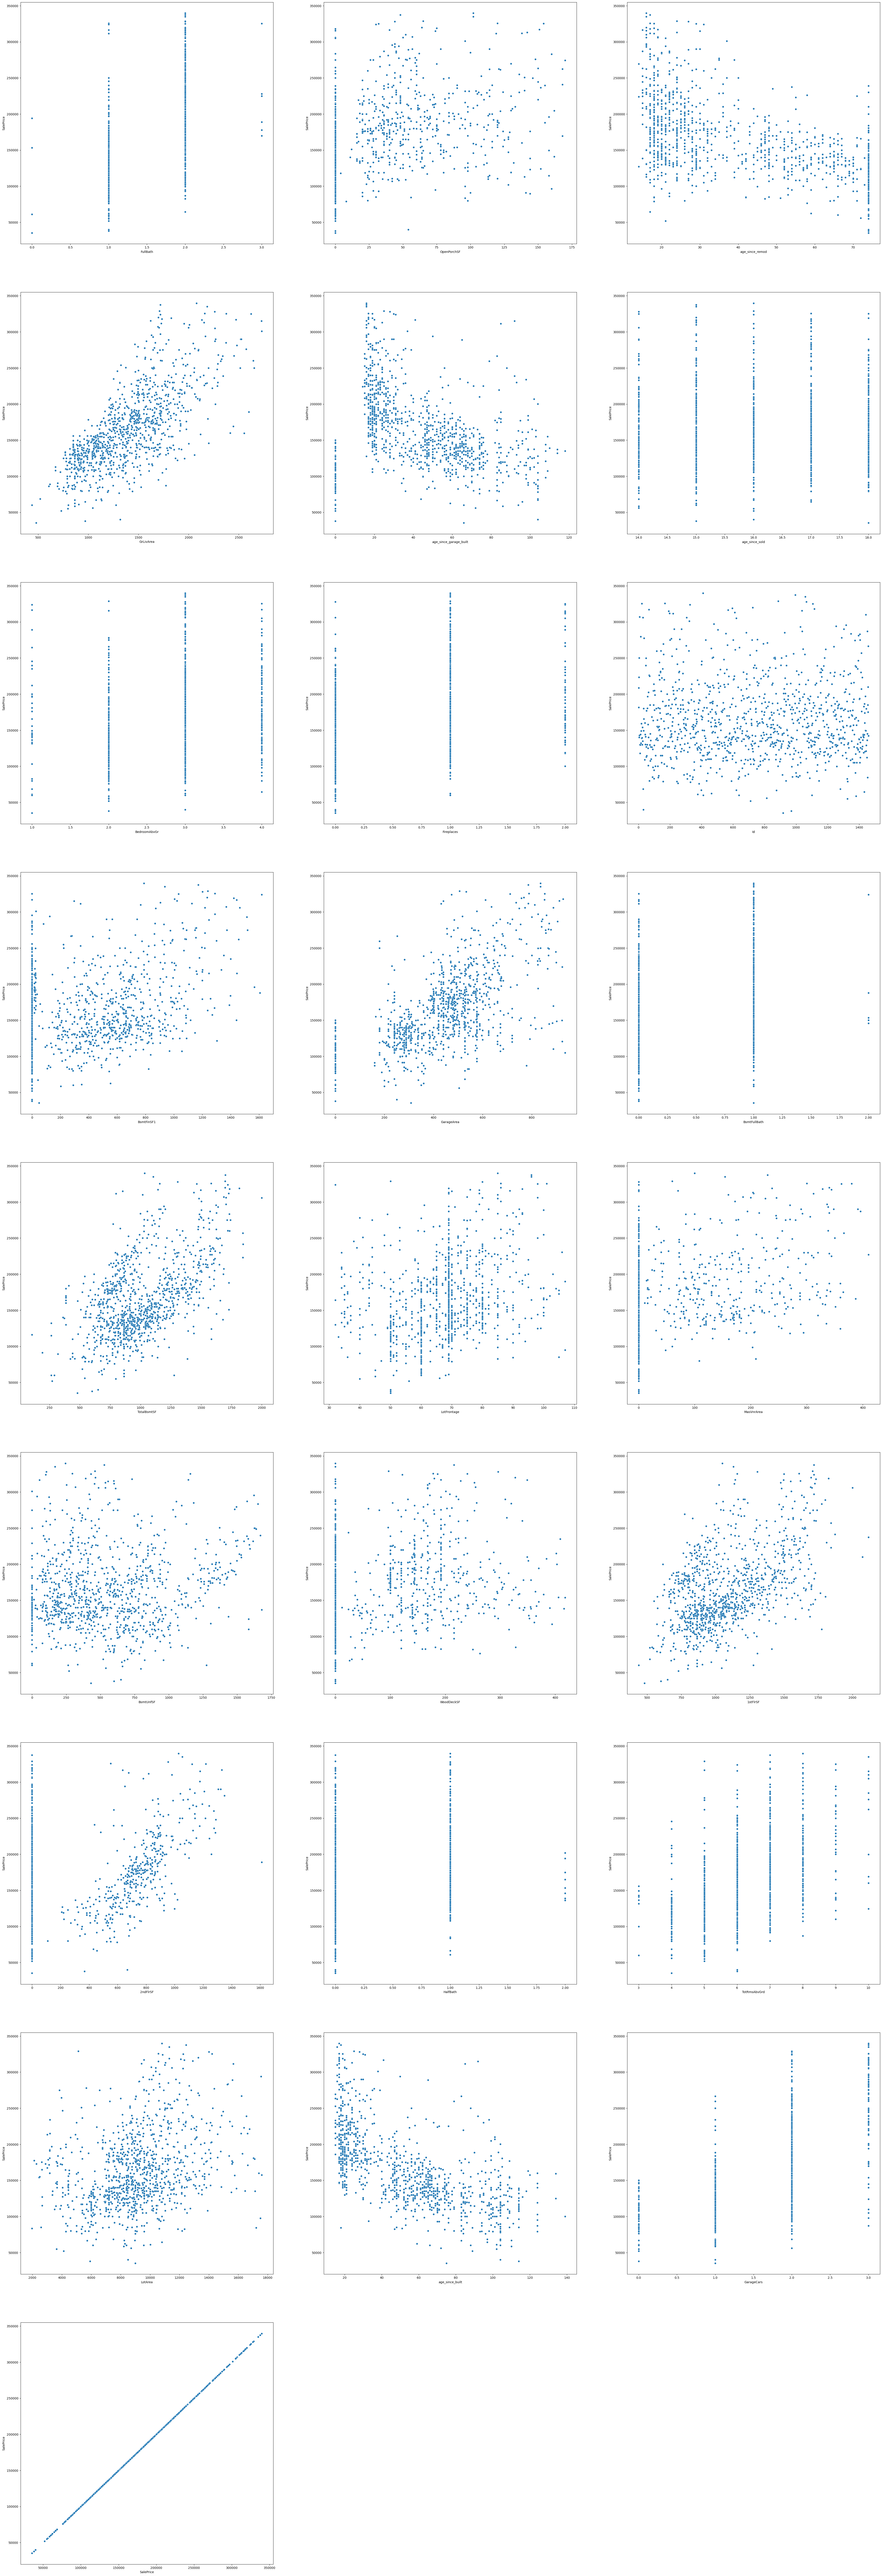

In [86]:
# Scatter plots for continuos variables against target
plt.figure(figsize = (50,150))

i = 1
for col in num_cols:
    plt.subplot(9,3,i)
    sns.scatterplot(y = 'SalePrice', x = col , data = df_sh)
    i = i + 1

#### Observations:
Following variables seem to have a linear relationship with the Sale Price:

1. GrLivArea
2. 1stFlrSF
3. TotalBsmtSF
4. BsmtFinSF2
5. 2ndFlrSF
6. GarageArea
7. LotArea
8. 1stFlrSF

We can build a linear model basis these observations.

In [87]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [88]:
# Bar plots for categorical variables
plt.figure(figsize = (50,350))

i = 1
for col in cat_cols:
    plt.subplot(16,3,i)
    sns.histplot(x = col , data = df_sh)
    i = i + 1

In [89]:
# Bar plots for categorical variables against Target Variable
plt.figure(figsize = (50,350))

i = 1
for col in cat_cols:
    plt.subplot(16,3,i)
    sns.barplot(x = col ,y = df_sh['SalePrice'], data = df_sh)
    i = i + 1

#### Lets analyse the below columns based on the graphs since they seem to have one value with for max records
1. Utilities
2. Condition2
3. RoofMatl
4. Heating

In [90]:
df_sh['Utilities'].value_counts()/len(df_sh['Utilities'])*100

AllPub    100.0
Name: Utilities, dtype: float64

In [91]:
df_sh['Condition2'].value_counts()/len(df_sh['Condition2'])*100

Norm      99.031008
Feedr      0.484496
Artery     0.193798
RRNn       0.193798
RRAn       0.096899
Name: Condition2, dtype: float64

In [92]:
df_sh['RoofMatl'].value_counts()/len(df_sh['RoofMatl'])*100

CompShg    99.515504
Tar&Grv     0.290698
WdShake     0.096899
WdShngl     0.096899
Name: RoofMatl, dtype: float64

In [93]:
df_sh['Heating'].value_counts()/len(df_sh['Heating'])*100

GasA    98.546512
GasW     0.775194
Grav     0.581395
OthW     0.096899
Name: Heating, dtype: float64

In [94]:
# Lets further analyse categorical columns with respect to the Sales Price to see of there is any
# variation in Sales Price.

# Box plots for categorical variables against target
plt.figure(figsize = (40,350))

i = 1
for col in cat_cols:
    plt.subplot(30,2,i)
    sns.boxplot(y = 'SalePrice', x = col , data = df_sh)
    i = i + 1
    plt.show

#### Observations
The following columns seem to impact the Sales Price-
1. OverallQual - As the Quality improves Sales Price rises.
2. 2 Story and 1 Story apartments which are 1946 and newer have a higher Sale price, so newer constructions have a higher Sale Price as expected.
3. MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
4. The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
5. All amenties in an excellent condition have a positive impact on the Sale Price as expected. for eg Fireplace, Kitchen and Quality or Basement Quality etc.
6. Sale for Partially completed houses (newer) is more.
7. The month sold does not seem to have any major variation on Sales.

In [95]:
# Creating a list for categorical columns that can be ignored (upto 99% one value)
ignore_cat_cols = ['Utilities','Condition2','RoofMatl','Heating']

In [96]:
df_sh.drop(columns=ignore_cat_cols, inplace = True)
df_sh.shape

(1032, 64)

In [97]:
cat_cols = list(set(cat_cols) - set(ignore_cat_cols))

<function matplotlib.pyplot.show(close=None, block=None)>

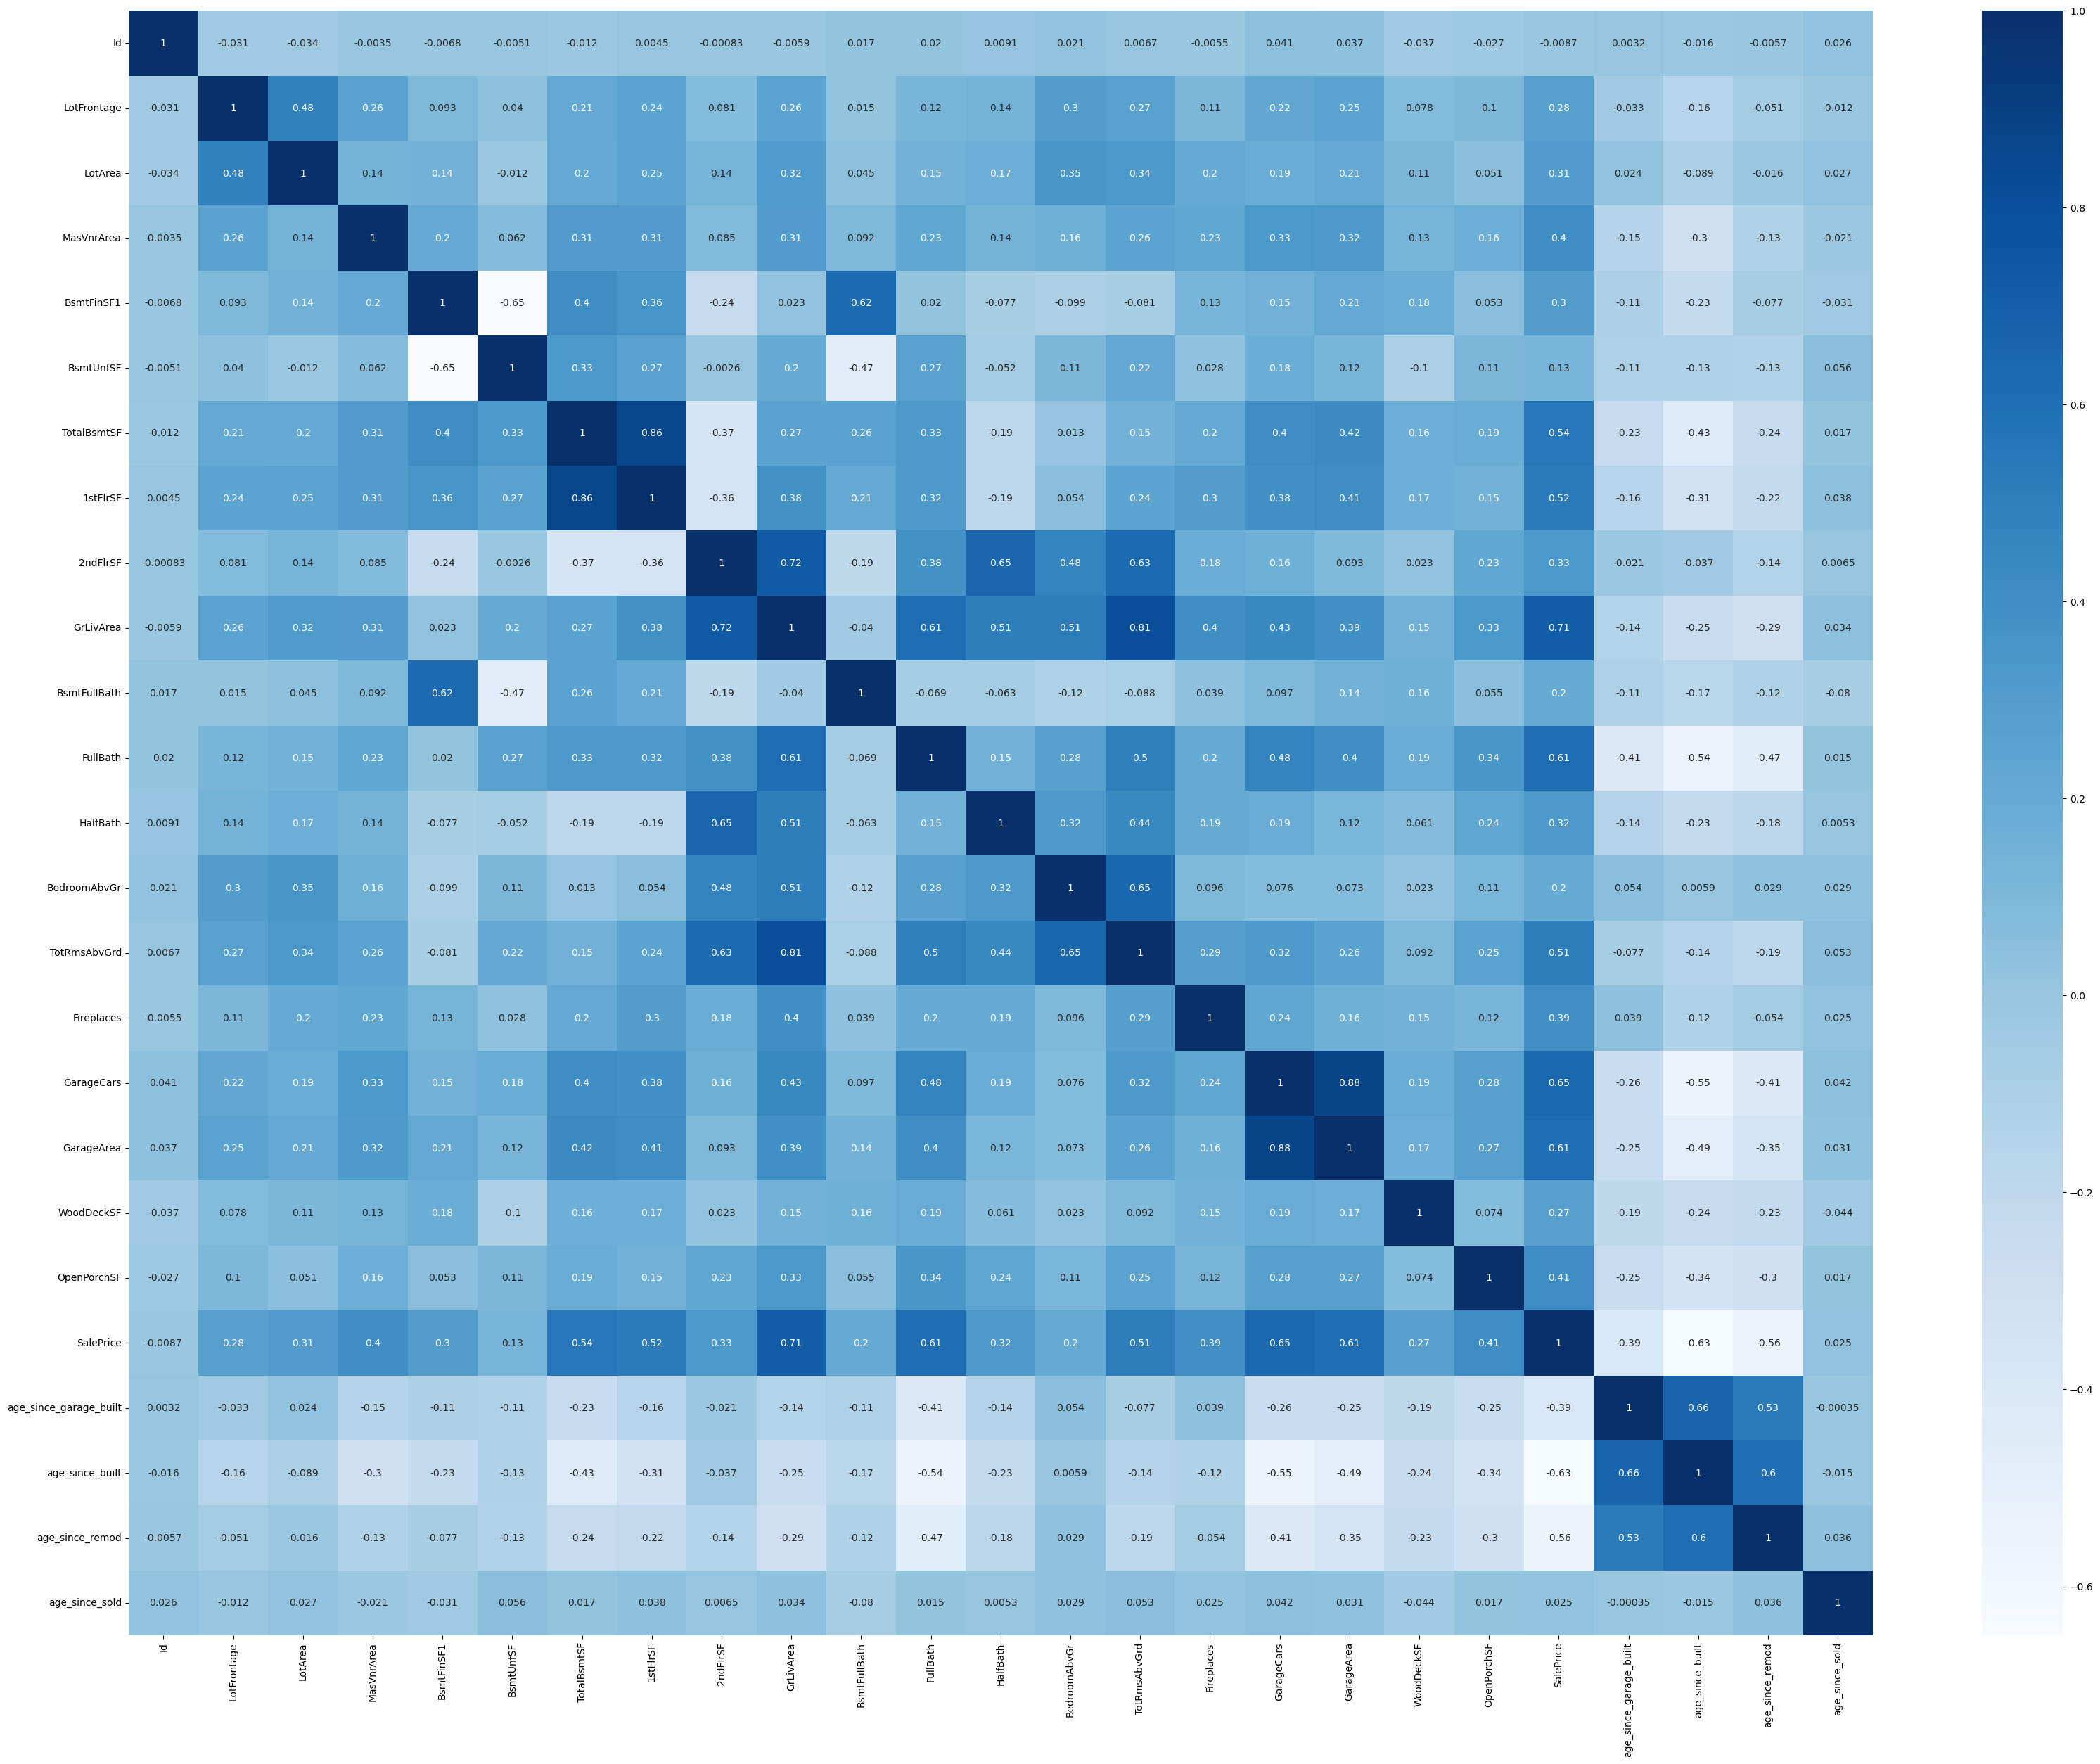

In [98]:
# Lets check the correlation matrix
plt.figure(figsize = (40,30))
sns.heatmap(data = df_sh.corr(), cmap = 'Blues', annot = True)
plt.show

#### Highly Correlated Pairs
1. GarageCars - GarageArea
2. GrLivArea - TotRmsAbvGrd
3. 1stFlrSF - TotalBsmtSF

Lets retrain one of the pairs mentioned above

In [99]:
ignore_num_cols_corr = ['GarageCars','TotRmsAbvGrd','TotalBsmtSF']

In [100]:
df_sh.drop(columns = ignore_num_cols_corr, inplace = True)

In [101]:
num_cols = list(set(num_cols) - set(ignore_num_cols_corr))

### Train and Test Split

In [102]:
# Saving in another dataframe to rollback
df2 = df_sh

In [103]:
# Converting categorical values to dummies
df_sh_dummy_data = df_sh[cat_cols]
df_sh_cat_dummy = pd.get_dummies(df_sh_dummy_data, drop_first = True)

In [104]:
num_cols

['FullBath',
 'OpenPorchSF',
 'BsmtFullBath',
 'age_since_remod',
 'LotFrontage',
 'MasVnrArea',
 'GrLivArea',
 'BsmtUnfSF',
 'age_since_garage_built',
 'age_since_sold',
 'WoodDeckSF',
 '1stFlrSF',
 'BedroomAbvGr',
 'Fireplaces',
 'Id',
 '2ndFlrSF',
 'HalfBath',
 'LotArea',
 'age_since_built',
 'BsmtFinSF1',
 'SalePrice',
 'GarageArea']

In [105]:
df_sh = pd.concat([df_sh, df_sh_cat_dummy], axis = 1 )

In [106]:
#Drop Categorical Columns
df_sh = df_sh.drop(columns = cat_cols, axis = 1)

In [107]:
df_sh.shape

(1032, 246)

In [108]:
# Dropping Id column since its unique
df_sh = df_sh.drop(columns = ['Id'], axis = 1)

In [109]:
#Split
X=df_sh.drop(["SalePrice"],axis=1)
y=df_sh["SalePrice"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 300)

In [110]:
num_cols.remove('SalePrice')

In [111]:
num_cols.remove('Id')

In [112]:
y_test

1441    149300
607     225000
305     305900
1124    163900
1244    230000
         ...  
1311    203000
1225    145000
615     137500
409     339750
1174    239000
Name: SalePrice, Length: 310, dtype: int64

In [113]:
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [114]:
X_train.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1   BsmtUnfSF  \
count   722.000000  722.000000  722.000000  722.000000  722.000000   
mean      0.475789    0.457810    0.162330    0.258501    0.326933   
std       0.189062    0.182094    0.255865    0.237401    0.227319   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.373333    0.353641    0.000000    0.000000    0.150000   
50%       0.493333    0.456707    0.000000    0.237801    0.288988   
75%       0.573333    0.562684    0.288363    0.423101    0.472470   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

         1stFlrSF    2ndFlrSF   GrLivArea  BsmtFullBath    FullBath  \
count  722.000000  722.000000  722.000000    722.000000  722.000000   
mean     0.390392    0.190109    0.421978      0.204986    0.502308   
std      0.177028    0.244461    0.171732      0.250276    0.174002   
min      0.000000    0.000000    0.000000      0.000000    0.000000   
25%      0.253722    0.000000    0.293630      0.000000    0.333333   
50%      0.352889    0.000000    0.416230      0.000000    0.666667   
75%      0.512656    0.427685    0.531741      0.500000    0.666667   
max      1.000000    1.000000    1.000000      1.000000    1.000000   

         HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
count  722.000000    722.000000  722.000000  722.000000  722.000000   
mean     0.171053      0.602955    0.265928    0.470452    0.199118   
std      0.241714      0.232782    0.304706    0.199865    0.251674   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      0.000000      0.333333    0.000000    0.325053    0.000000   
50%      0.000000      0.666667    0.000000    0.482906    0.000000   
75%      0.500000      0.666667    0.500000    0.589744    0.377990   
max      1.000000      1.000000    1.000000    1.000000    1.000000   

       OpenPorchSF  age_since_garage_built  age_since_built  age_since_remod  \
count   722.000000              722.000000       722.000000       722.000000   
mean      0.191429                0.379173         0.330815         0.428647   
std       0.247235                0.228700         0.254452         0.349216   
min       0.000000                0.000000         0.000000         0.000000   
25%       0.000000                0.177966         0.084034         0.116667   
50%       0.094118                0.372881         0.319328         0.283333   
75%       0.317647                0.542373         0.495798         0.750000   
max       1.000000                1.000000         1.000000         1.000000   

       age_since_sold  CentralAir_Y  BsmtExposure_Gd  BsmtExposure_Mn  \
count      722.000000    722.000000       722.000000       722.000000   
mean         0.531856      0.937673         0.072022         0.073407   
std          0.335213      0.241916         0.258704         0.260985   
min          0.000000      0.000000         0.000000         0.000000   
25%          0.250000      1.000000         0.000000         0.000000   
50%          0.500000      1.000000         0.000000         0.000000   
75%          0.750000      1.000000         0.000000         0.000000   
max          1.000000      1.000000         1.000000         1.000000   

       BsmtExposure_NA  BsmtExposure_No  GarageQual_Fa  GarageQual_Gd  \
count       722.000000       722.000000     722.000000     722.000000   
mean          0.001385         0.713296       0.036011       0.005540   
std           0.037216         0.452535       0.186447       0.074277   
min           0.000000         0.000000       0.000000       0.000000   
25%           0.000000         0.000000       0.000000       0.000000   
50%           0.000000         1.000000       0.000000       0.000000   
75%           0.000000         1.000000       0.000000       0.000000   
max           1.000000         1.000000       1.000000       1.000000   

       GarageQual_NA  GarageQual_Po  GarageQual_TA  LandCon

In [115]:
estimator=LinearRegression()
selector=estimator.fit(X_train,y_train)

In [116]:
# Print the coefficients and intercept
print(selector.intercept_)
print(selector.coef_)

-5256105205464079.0
[ 6.00010718e+03  1.68000527e+04  6.96214830e+03  3.04545095e+04
  1.41022573e+04  1.32817086e+04  1.47136545e+04  9.98149597e+04
  3.66232214e+03  5.01266448e+03  4.88258562e+03 -1.99030583e+03
  1.00892517e+04  1.91535553e+04  6.71406570e+03  6.46263692e+03
 -1.09225405e+04 -3.07426561e+04 -5.89285388e+03 -1.13097127e+03
  2.03767240e+03  1.34006423e+04 -8.58717512e+02 -1.08847855e+04
 -2.70204435e+02  3.06434107e+14  3.06434107e+14 -1.34887247e+15
  3.06434107e+14  3.06434107e+14 -5.17842109e+01 -9.81208178e+03
 -1.74746466e+02 -1.79248521e+14 -3.01500000e+03  5.29087563e+14
 -2.25101250e+04 -2.09481875e+04 -8.84687871e+13 -1.65672500e+04
 -2.03772031e+04 -2.63977206e+14 -9.25916211e+03 -2.12840703e+04
 -2.40040312e+04 -1.81892305e+04  2.36727188e+04  6.21567188e+03
 -1.00650273e+04 -9.47349805e+03 -4.12500000e+03 -3.96628906e+03
  1.28967812e+04  4.20849902e+03  1.25231289e+04 -4.98399219e+03
  1.80902070e+04 -1.33079688e+04 -4.02804688e+03 -1.81701562e+03
 -8.1

In [117]:
y_train_pred = selector.predict(X_train)
y_test_pred = selector.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.9507100699541392
r2 test:  -3.0118160007874548e+19
rss1:  99950702393.0
rss2:  2.79691783165313e+31
MSE train:  138435875.89058173
MSE test:  9.022315585977839e+28


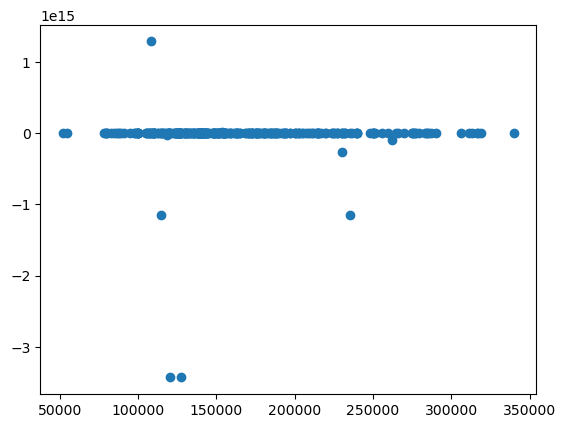

In [118]:
plt.scatter(y_test, y_test_pred)

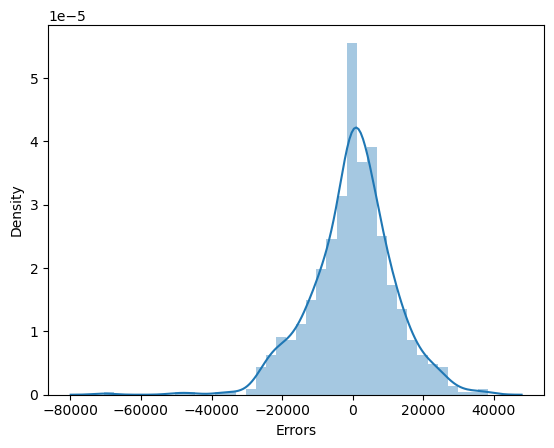

In [119]:
sns.distplot(y_train - y_train_pred)
plt.xlabel('Errors')
plt.show()

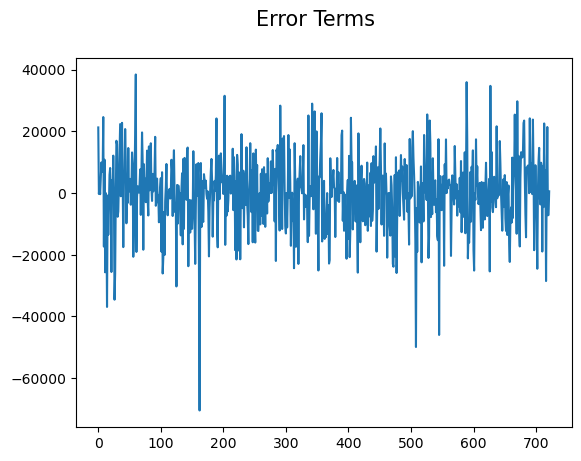

In [120]:
# Error Terms

e = [i for i in range(0, len(X_train),1)]
plt.plot(e,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

### The model using all of the features is highly overfitting. The difference between train and test R2 is extreme.Lets Try the Regularisation Approach for overfitting without RFE.

## Ridge and Lasso Regression

### Ridge Regression

In [121]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [122]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-12821.03234645656


In [123]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.15092793e+03,  1.38434322e+04,  7.06489221e+03,  2.26306948e+04,
        9.17731818e+03,  4.14393993e+04,  2.50471120e+04,  4.95330911e+04,
        5.00686379e+03,  1.17318882e+04,  7.17470597e+03,  1.79696944e+03,
        1.08881814e+04,  1.86903687e+04,  6.29556169e+03,  7.74567709e+03,
       -8.36174626e+03, -1.83231701e+04, -9.03237658e+03, -7.00910519e+02,
        4.87330179e+03,  1.33505759e+04, -2.14097672e+03, -4.05872254e+03,
       -1.66399168e+03, -2.94102522e+02, -1.22141616e+03, -3.19981519e+02,
       -1.84811243e+03,  3.68361262e+03,  1.16407309e+02, -4.14377501e+03,
        2.10194378e+03, -5.29505394e+03,  1.35704563e+04, -3.93089526e+03,
        5.37477076e+02, -2.78176150e+03,  0.00000000e+00,  8.60714082e+02,
       -3.86515748e+03,  0.00000000e+00,  3.42919938e+03, -2.55905266e+03,
       -7.06437561e+03, -1.95048933e+03,  5.27147098e+03,  8.92673089e+01,
       -4.00753124e+02, -1.54030059e+03, -4.37633535e+03, -2.93023643e+03,
       -2.64014850e+02,  

In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9440936414354402
0.9029818000249823
113367574300.94815
90095787204.15526
157018800.9708423
290631571.6263073


### Lasso Regression

In [125]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-12631.870343074163


In [127]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [128]:
coeff = lasso.coef_
print(coeff)

[ 5.65585240e+03  1.30946010e+04  3.90266452e+03  1.72062961e+04
  0.00000000e+00  1.64115902e+04  0.00000000e+00  1.15081097e+05
  3.79293335e+03  1.29604666e+03  4.83733932e+02 -0.00000000e+00
  6.57374496e+03  1.77637860e+04  5.70698198e+03  6.63450315e+03
 -2.60060371e+03 -3.35820455e+04 -7.66832642e+03 -7.14962323e+02
  3.09181691e+03  1.32332636e+04 -1.42057379e+01 -0.00000000e+00
 -8.11683489e+01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.01141171e+03 -0.00000000e+00 -0.00000000e+00
  1.82297686e+03 -0.00000000e+00  1.34623567e+04 -0.00000000e+00
  2.92976598e+03 -0.00000000e+00  0.00000000e+00  1.82115121e+03
 -9.05022606e+02  0.00000000e+00  1.48823183e+03 -0.00000000e+00
 -4.05262942e+03  0.00000000e+00  7.45113847e+03  2.06040675e+03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.12000054e+04  1.19074197e+04 -0.00000000e+00
  2.11502448e+04 -3.92904530e+03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.80293

<Axes: title={'center': 'Model Coefficients'}>

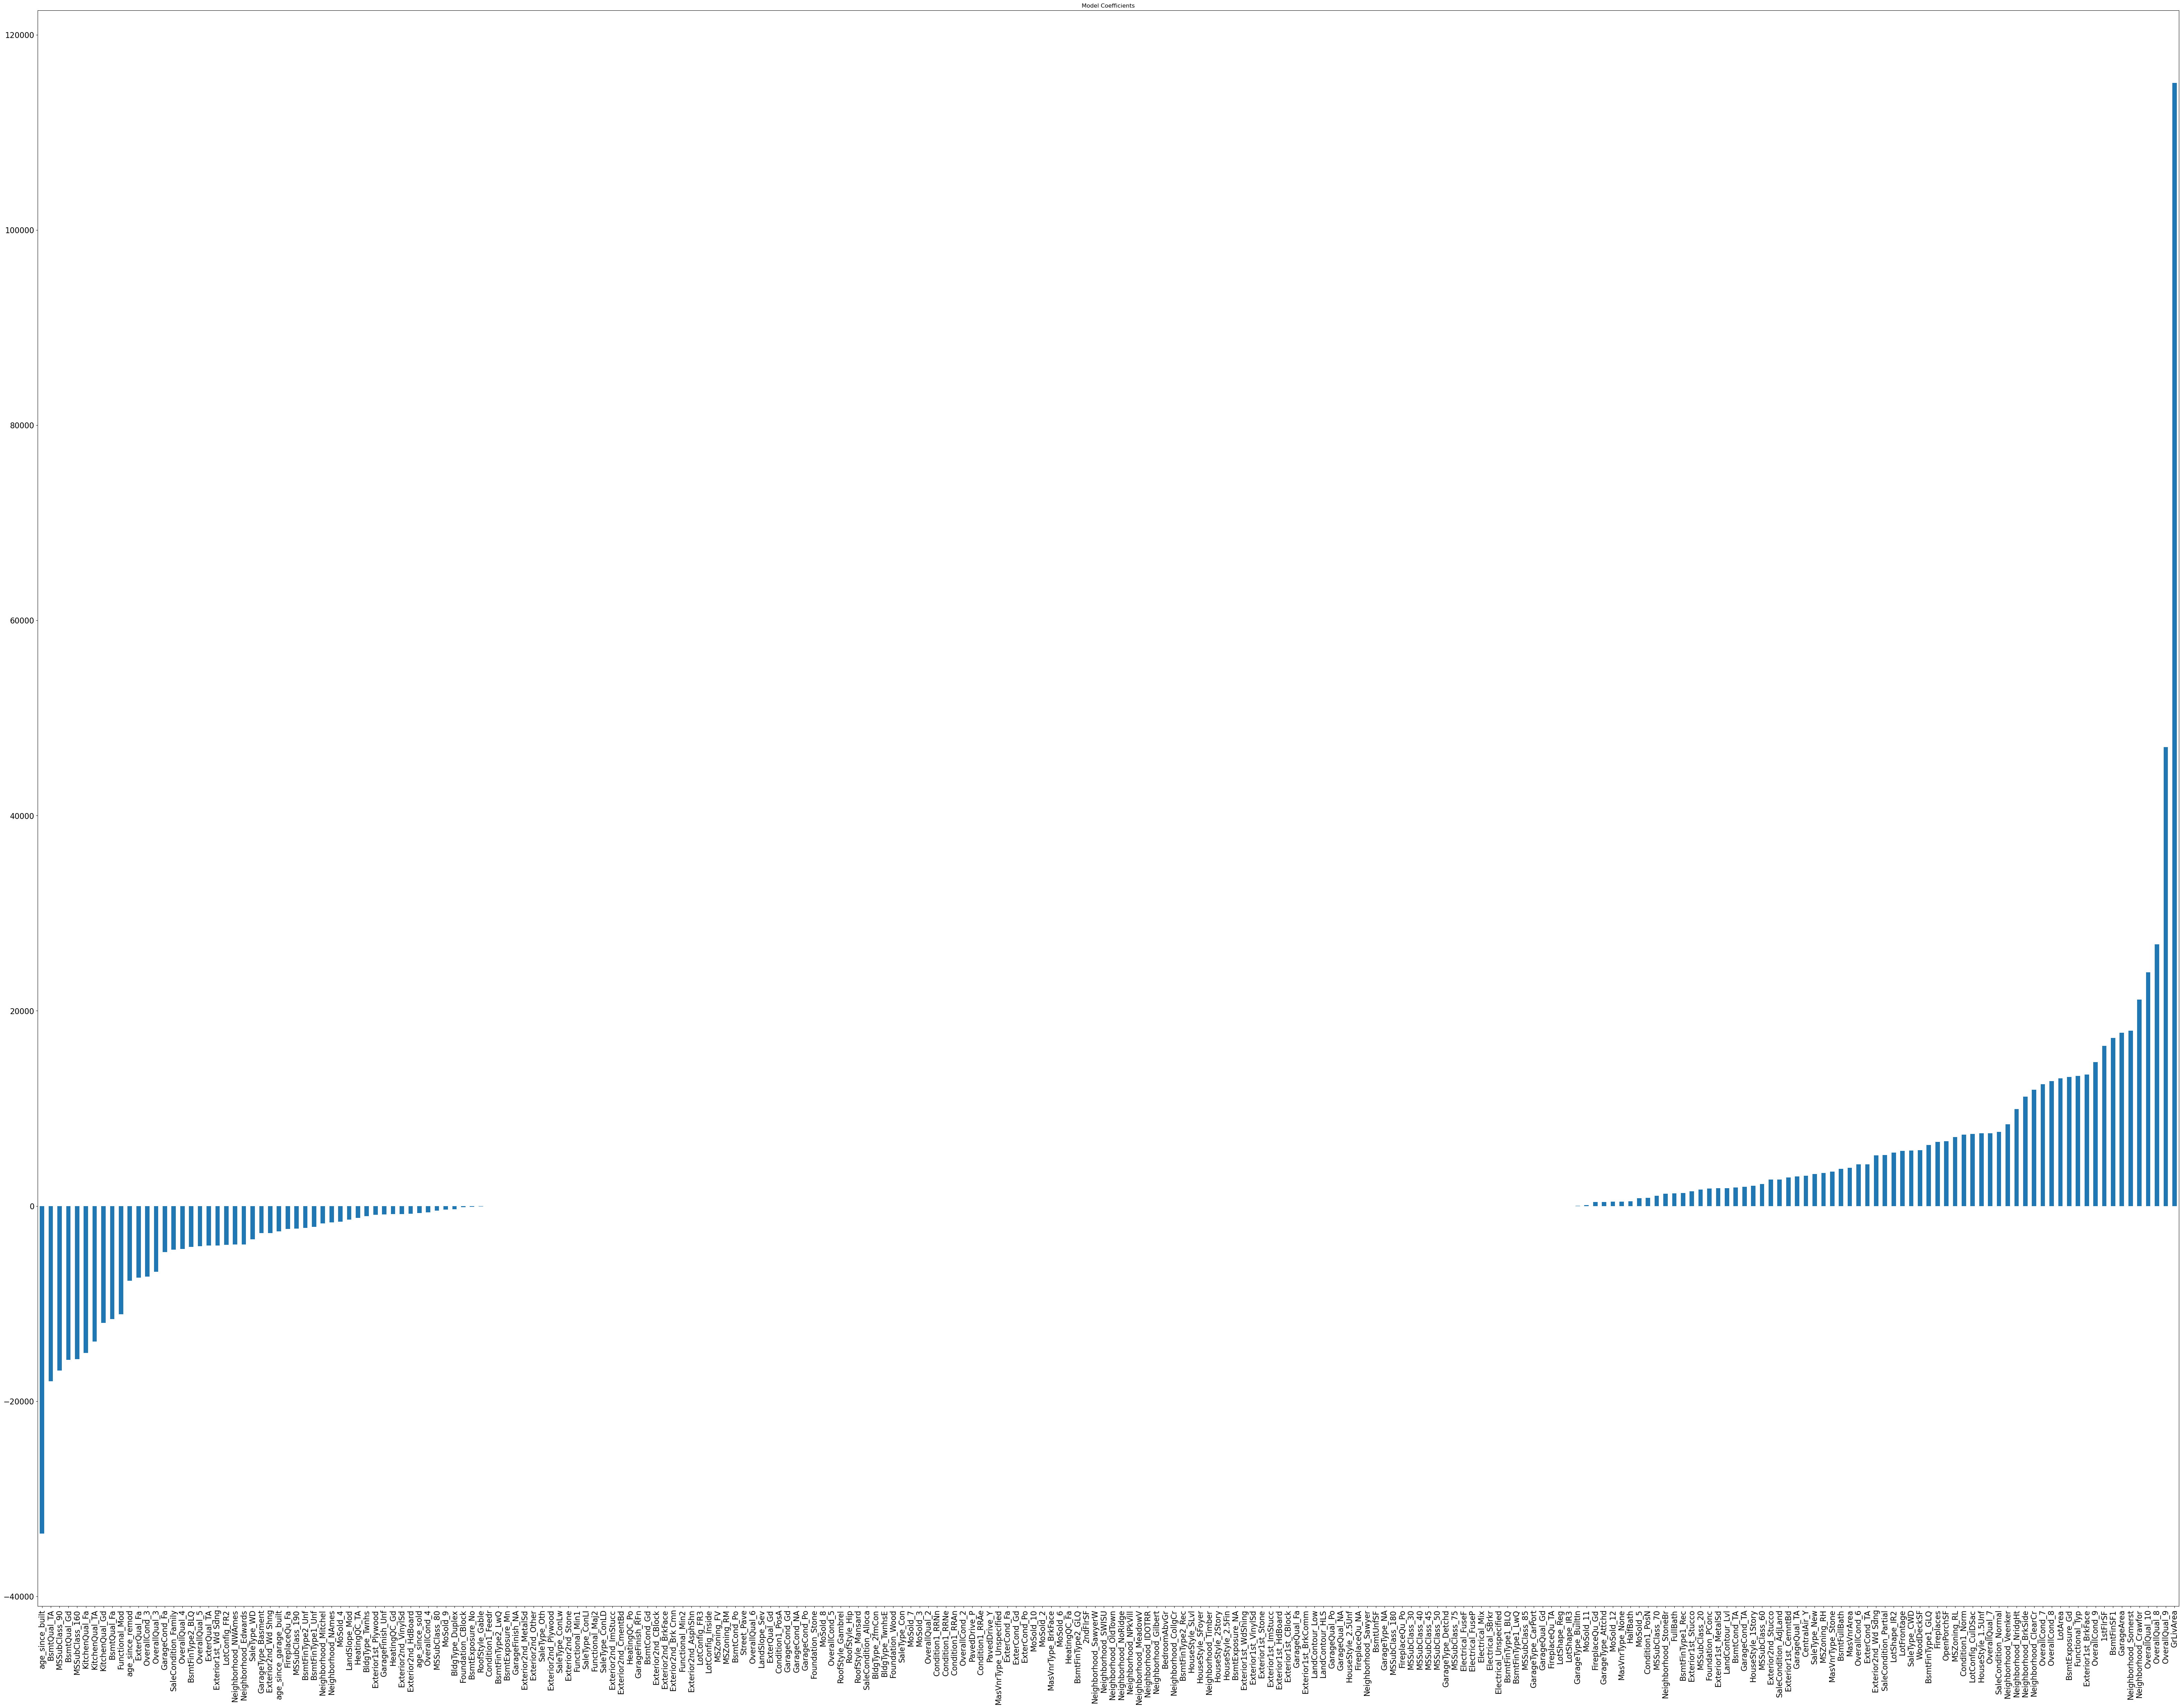

In [129]:
predictors = X_train.columns

coef = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients', fontsize='16',figsize=(80, 60))

#### This is a visualisation of the predictor values. The left side denotes negative impact, the right side positive impact. It can be noted that GrLivArea has by far the largest impact.

In [132]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9388781670408795
0.9120512003344727
123943574886.95076
81673503956.6454
171667001.22846365
263462915.98917872


In [133]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.507101e-01      9.440936e-01      9.388782e-01
1   R2 Score (Test)      -3.011816e+19      9.029818e-01      9.120512e-01
2       RSS (Train)       9.995070e+10      1.133676e+11      1.239436e+11
3        RSS (Test)       2.796918e+31      9.009579e+10      8.167350e+10
4       MSE (Train)       1.176588e+04      1.253071e+04      1.310218e+04
5        MSE (Test)       3.003717e+14      1.704792e+04      1.623154e+04

#### As you can see that there is slight improvement in Lasso Regression vs Ridge. Both methods led to improved model performance. Lasso is slightly better since not all predictors are probably contributing to the Sale Price and Lasso has effectively eliminated the predictors.

In [134]:
betas = pd.DataFrame(index = X.columns)

In [135]:
betas.rows = X.columns

In [136]:
betas['Linear'] = selector.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [137]:
betas['Ridge_Pos_Neg_Corr'] = betas['Ridge'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas['Lasso_Pos_Neg_Corr'] = betas['Lasso'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas['Ridge_abs'] = betas['Ridge'].abs()
betas['Lasso_abs'] = betas['Lasso'].abs()

#### Lets compare the coefficients to understand how important the predictors are with respect to Ridge/Lasso

In [138]:
# Lets look at the top 20 contributing factors for Ridge Regression Model (Both Positive and Neg correlation)
betas.sort_values(by = 'Ridge_abs', ascending = False).head(20)

Linear         Ridge          Lasso  \
GrLivArea             9.981496e+04  49533.091117  115081.097021   
1stFlrSF              1.328171e+04  41439.399288   16411.590244   
OverallQual_9        -6.884137e+14  28423.912540   47018.660851   
2ndFlrSF              1.471365e+04  25047.112029       0.000000   
BsmtFinSF1            3.045451e+04  22630.694816   17206.296089   
GarageArea            1.915356e+04  18690.368671   17763.786014   
age_since_built      -3.074266e+04 -18323.170135  -33582.045463   
BsmtQual_TA          -1.771620e+04 -17759.035322  -17946.336150   
OverallQual_8        -6.884137e+14  16754.562940   26800.496768   
Neighborhood_Crawfor  1.809021e+04  16644.850355   21150.244830   
BsmtQual_Gd          -1.534889e+04 -16310.476936  -15783.870831   
Neighborhood_Somerst  1.946633e+04  15387.626478   17967.770849   
KitchenQual_Fa       -2.141658e+04 -13999.992042  -15048.892696   
LotArea               1.680005e+04  13843.432151   13094.600959   
Functional_Mod       -3.740040e+04 -13735.036488  -11087.898958   
Exterior1st_BrkFace  -3.015000e+03  13570.456293   13462.356728   
KitchenQual_TA       -1.858391e+04 -13476.392876  -13897.455456   
BsmtExposure_Gd       1.340064e+04  13350.575858   13233.263642   
OverallQual_10       -6.884137e+14  12418.400595   23930.272663   
OverallQual_3        -6.884137e+14 -12017.117651   -6740.929714   

                     Ridge_Pos_Neg_Corr Lasso_Pos_Neg_Corr     Ridge_abs  \
GrLivArea                           Pos                Pos  49533.091117   
1stFlrSF                            Pos                Pos  41439.399288   
OverallQual_9                       Pos                Pos  28423.912540   
2ndFlrSF                            Pos                Pos  25047.112029   
BsmtFinSF1                          Pos                Pos  22630.694816   
GarageArea                          Pos                Pos  18690.368671   
age_since_built                     Neg                Neg  18323.170135   
BsmtQual_TA                         Neg                Neg  17759.035322   
OverallQual_8                       Pos                Pos  16754.562940   
Neighborhood_Crawfor                Pos                Pos  16644.850355   
BsmtQual_Gd                         Neg                Neg  16310.476936   
Neighborhood_Somerst                Pos                Pos  15387.626478   
KitchenQual_Fa                      Neg                Neg  13999.992042   
LotArea                             Pos                Pos  13843.432151   
Functional_Mod                      Neg                Neg  13735.036488   
Exterior1st_BrkFace                 Pos                Pos  13570.456293   
KitchenQual_TA                      Neg                Neg  13476.392876   
BsmtExposure_Gd                     Pos                Pos  13350.575858   
OverallQual_10                      Pos                Pos  12418.400595   
OverallQual_3                       Neg                Neg  12017.117651   

                          Lasso_abs  
GrLivArea             115081.097021  
1stFlrSF               16411.590244  
OverallQual_9          47018.660851  
2ndFlrSF                   0.000000  
BsmtFinSF1             17206.296089  
GarageArea             17763.786014  
age_since_built        33582.045463  
BsmtQual_TA            17946.336150  
OverallQual_8          26800.496768  
Neighborhood_Crawfor   21150.244830  
BsmtQual_Gd            15783.870831  
Neighborhood_Somerst   17967.770849  
KitchenQual_Fa         15048.892696  
LotArea                13094.600959  
Functional_Mod         11087.898958  
Exterior1st_BrkFace    13462.356728  
KitchenQual_TA         13897.455456  
BsmtExposure_Gd        13233.263642  
OverallQual_10         23930.272663  
OverallQual_3           6740.929714

#### The top 20 influencing factors as per Ridge Regression are :
1. GrLivArea
2. 1stFlrSF
3. OverallQual_9
4. 2ndFlrSF
5. BsmtFinSF1
6. GarageArea
7. age_since_built - (custom - negative correlation - so the newer the price rises)
8. BsmtQual_TA - (Neg Correlation)
9. OverallQual_8
10. Neighborhood_Crawfor
11. BsmtQual_Gd - (Neg Correlation)
12. Neighborhood_Somerst
13. KitchenQual_Fa - (Neg Correlation)
14. LotArea
15. Functional_Mod - (Neg Correlation)
16. Exterior1st_BrkFace
17. KitchenQual_TA - (Neg correlation)
18. BsmtExposire_Gd
19. OverallQual_10
20. OverallQual_3 - (Neg correlation)

In [139]:
betas.sort_values(by = 'Lasso_abs', ascending = False).head(20)

Linear         Ridge          Lasso  \
GrLivArea             9.981496e+04  49533.091117  115081.097021   
OverallQual_9        -6.884137e+14  28423.912540   47018.660851   
age_since_built      -3.074266e+04 -18323.170135  -33582.045463   
OverallQual_8        -6.884137e+14  16754.562940   26800.496768   
OverallQual_10       -6.884137e+14  12418.400595   23930.272663   
Neighborhood_Crawfor  1.809021e+04  16644.850355   21150.244830   
Neighborhood_Somerst  1.946633e+04  15387.626478   17967.770849   
BsmtQual_TA          -1.771620e+04 -17759.035322  -17946.336150   
GarageArea            1.915356e+04  18690.368671   17763.786014   
BsmtFinSF1            3.045451e+04  22630.694816   17206.296089   
MSSubClass_90        -1.227239e+15  -8823.378463  -16881.984295   
1stFlrSF              1.328171e+04  41439.399288   16411.590244   
BsmtQual_Gd          -1.534889e+04 -16310.476936  -15783.870831   
MSSubClass_160       -1.455310e+04 -10992.059001  -15697.880903   
KitchenQual_Fa       -2.141658e+04 -13999.992042  -15048.892696   
OverallCond_9         2.492287e+15  11426.297177   14753.544834   
KitchenQual_TA       -1.858391e+04 -13476.392876  -13897.455456   
Exterior1st_BrkFace  -3.015000e+03  13570.456293   13462.356728   
Functional_Typ       -6.659961e+03   7220.185767   13338.833183   
BsmtExposure_Gd       1.340064e+04  13350.575858   13233.263642   

                     Ridge_Pos_Neg_Corr Lasso_Pos_Neg_Corr     Ridge_abs  \
GrLivArea                           Pos                Pos  49533.091117   
OverallQual_9                       Pos                Pos  28423.912540   
age_since_built                     Neg                Neg  18323.170135   
OverallQual_8                       Pos                Pos  16754.562940   
OverallQual_10                      Pos                Pos  12418.400595   
Neighborhood_Crawfor                Pos                Pos  16644.850355   
Neighborhood_Somerst                Pos                Pos  15387.626478   
BsmtQual_TA                         Neg                Neg  17759.035322   
GarageArea                          Pos                Pos  18690.368671   
BsmtFinSF1                          Pos                Pos  22630.694816   
MSSubClass_90                       Neg                Neg   8823.378463   
1stFlrSF                            Pos                Pos  41439.399288   
BsmtQual_Gd                         Neg                Neg  16310.476936   
MSSubClass_160                      Neg                Neg  10992.059001   
KitchenQual_Fa                      Neg                Neg  13999.992042   
OverallCond_9                       Pos                Pos  11426.297177   
KitchenQual_TA                      Neg                Neg  13476.392876   
Exterior1st_BrkFace                 Pos                Pos  13570.456293   
Functional_Typ                      Pos                Pos   7220.185767   
BsmtExposure_Gd                     Pos                Pos  13350.575858   

                          Lasso_abs  
GrLivArea             115081.097021  
OverallQual_9          47018.660851  
age_since_built        33582.045463  
OverallQual_8          26800.496768  
OverallQual_10         23930.272663  
Neighborhood_Crawfor   21150.244830  
Neighborhood_Somerst   17967.770849  
BsmtQual_TA            17946.336150  
GarageArea             17763.786014  
BsmtFinSF1             17206.296089  
MSSubClass_90          16881.984295  
1stFlrSF               16411.590244  
BsmtQual_Gd            15783.870831  
MSSubClass_160         15697.880903  
KitchenQual_Fa         15048.892696  
OverallCond_9          14753.544834  
KitchenQual_TA         13897.455456  
Exterior1st_BrkFace    13462.356728  
Functional_Typ         13338.833183  
BsmtExposure_Gd        13233.263642

#### The top 20 influencing factors as per Lasso Regression are :
1. GrLivArea
2. OverallQual_9
3. age_since_built  - (custom - negative correlation - so the newer the price rises)
4. OverallQual_8
5. OverallQual_10
6. Neighborhood_Crawfor
7. Neighborhood_Somerst
8. BsmtQual_TA - (Neg Correlation)
9. GarageArea
10. BsmtFinSF1
11. 1stFlrSF
12. BsmtQual_Gd - (Neg correlation)
13. MSSubClass_160 - (Neg Correlation)
14. BldgType_Duplex - (Neg correlation)
15. KitchenQual_Fa - (Neg Correlation)
16. OverallQual_9
17. KitchenQual_TA - (Neg correlation)
18. Exterior1st_BrkFace
19. Functional_Typ
20. BsmtExposure_Gd

#### As we can see the top 20 contributors for Ridge and Lasso are almost the same with some minor differences. The correlations are also the same.

#### Optimal Alpha Value 
Ridge - 2

Lasso - 50

#### Doubling the alpha values for both and checking for assignment

In [140]:
X_train_new = X_train
y_train_new = y_train

In [141]:
alpha_new = 4
ridge_new = Ridge(alpha=alpha_new)
ridge_new.fit(X_train_new, y_train_new)
ridge_new.coef_

array([ 9.98139453e+03,  1.34762697e+04,  6.90242288e+03,  2.07367179e+04,
        8.27839441e+03,  3.74714120e+04,  2.07145583e+04,  4.27417136e+04,
        5.53252550e+03,  1.26261314e+04,  7.57306199e+03,  3.64967911e+03,
        1.04002184e+04,  1.90894144e+04,  6.34114927e+03,  8.39296364e+03,
       -7.08827924e+03, -1.37318438e+04, -1.00791565e+04, -4.51963046e+02,
        5.61224405e+03,  1.29724047e+04, -2.60834039e+03, -2.73440297e+03,
       -2.23976805e+03, -7.08589074e+02, -1.31654706e+03, -7.73089359e+02,
       -4.05481284e+02,  3.20370678e+03,  3.82174526e+02, -3.12575747e+03,
        2.28138648e+03, -3.83957663e+03,  1.33613333e+04, -2.69222122e+03,
        1.77867585e+03, -2.52191643e+03,  0.00000000e+00,  8.77350176e+02,
       -3.49697200e+03,  0.00000000e+00,  2.48006158e+03, -2.46585221e+03,
       -6.43225545e+03, -1.89174732e+03,  3.66161212e+03, -6.52898519e+02,
       -1.72331158e+02, -7.23403447e+02, -2.65207131e+03, -3.35510092e+03,
       -1.10399655e+03,  

In [142]:
X_test_new = X_test
y_test_new = y_test

In [144]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_new = ridge_new.predict(X_train_new)
y_pred_test_new = ridge_new.predict(X_test_new)

metric4 = []
r2_train_lr_new = r2_score(y_train_new, y_pred_train_new)
print(r2_train_lr_new)
metric4.append(r2_train_lr_new)

r2_test_lr_new = r2_score(y_test_new, y_pred_test_new)
print(r2_test_lr_new)
metric4.append(r2_test_lr_new)

rss1_lr_new = np.sum(np.square(y_train_new - y_pred_train_new))
print(rss1_lr_new)
metric4.append(rss1_lr_new)

rss2_lr_new = np.sum(np.square(y_test_new - y_pred_test_new))
print(rss2_lr_new)
metric4.append(rss2_lr_new)

mse_train_lr_new = mean_squared_error(y_train_new, y_pred_train_new)
print(mse_train_lr_new)
metric4.append(mse_train_lr_new**0.5)

mse_test_lr_new = mean_squared_error(y_test_new, y_pred_test_new)
print(mse_test_lr_new)
metric4.append(mse_test_lr_new**0.5)

0.9389446674985403
0.901358748867163
123808724473.35777
91603030914.86102
171480227.8024346
295493648.1124549


In [145]:
alpha_new =100

lasso_new = Lasso(alpha=alpha_new)
        
lasso_new.fit(X_train_new, y_train_new) 

Lasso(alpha=100)

In [146]:
coeff_new = lasso_new.coef_
print(coeff_new)

[ 5.06745054e+03  1.27930170e+04  2.14993036e+03  1.71697545e+04
  0.00000000e+00  1.81198774e+04  0.00000000e+00  1.08689440e+05
  3.40237234e+03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  7.26580485e+03  1.86704840e+04  6.00542252e+03  6.13057658e+03
 -0.00000000e+00 -3.16121712e+04 -9.46853624e+03 -0.00000000e+00
  3.65903350e+03  1.28890999e+04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.59804173e+03 -0.00000000e+00 -0.00000000e+00
  1.04384625e+03 -0.00000000e+00  1.34467728e+04 -0.00000000e+00
  2.75420170e+03 -0.00000000e+00  0.00000000e+00  1.62926809e+03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -8.15788455e+02  0.00000000e+00  3.44279749e+03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  9.29876975e+03  5.69466966e+03 -0.00000000e+00
  2.01392209e+04 -3.01674642e+03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -4.44531

In [148]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_new = lasso_new.predict(X_train_new)
y_pred_test_new = lasso_new.predict(X_test_new)

metric5 = []
r2_train_lr_new = r2_score(y_train_new, y_pred_train_new)
print(r2_train_lr_new)
metric5.append(r2_train_lr_new)

r2_test_lr_new = r2_score(y_test_new, y_pred_test_new)
print(r2_test_lr_new)
metric5.append(r2_test_lr_new)

rss1_lr_new = np.sum(np.square(y_train_new - y_pred_train_new))
print(rss1_lr_new)
metric5.append(rss1_lr_new)

rss2_lr_new = np.sum(np.square(y_test_new - y_pred_test_new))
print(rss2_lr_new)
metric5.append(rss2_lr_new)

mse_train_lr_new = mean_squared_error(y_train_new, y_pred_train_new)
print(mse_train_lr_new)
metric5.append(mse_train_lr_new**0.5)

mse_test_lr_new = mean_squared_error(y_test_new, y_pred_test_new)
print(mse_test_lr_new)
metric5.append(mse_test_lr_new**0.5)

0.9304223732517236
0.9126594170378289
141090333418.1584
81108684544.47632
195415974.26337728
261640917.88540748


In [149]:
# Creating a table which contain all the metrics

lr_table_new = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric_new = pd.DataFrame(lr_table_new ,columns = ['Metric', 'Linear Regression'] )

rg_metric_new = pd.Series(metric4, name = 'Ridge Regression')
ls_metric_new = pd.Series(metric5, name = 'Lasso Regression')

final_metric_new = pd.concat([lr_metric_new, rg_metric_new, ls_metric_new], axis = 1)

final_metric_new

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.507101e-01      9.389447e-01      9.304224e-01
1   R2 Score (Test)      -3.011816e+19      9.013587e-01      9.126594e-01
2       RSS (Train)       9.995070e+10      1.238087e+11      1.410903e+11
3        RSS (Test)       2.796918e+31      9.160303e+10      8.110868e+10
4       MSE (Train)       1.176588e+04      1.309505e+04      1.397913e+04
5        MSE (Test)       3.003717e+14      1.718993e+04      1.617532e+04

In [150]:
betas_new = pd.DataFrame(index = X.columns)

In [151]:
betas_new.rows = X.columns

In [152]:
betas_new['Linear'] = selector.coef_
betas_new['Ridge'] = ridge.coef_
betas_new['Lasso'] = lasso.coef_
betas_new['Ridge_new'] = ridge_new.coef_
betas_new['Lasso_new'] = lasso_new.coef_

In [153]:
betas_new['Ridge_Pos_Neg_Corr'] = betas_new['Ridge'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas_new['Lasso_Pos_Neg_Corr'] = betas_new['Lasso'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas_new['Ridge_abs'] = betas_new['Ridge'].abs()
betas_new['Lasso_abs'] = betas_new['Lasso'].abs()
betas_new['Ridge_Pos_Neg_Corr_new'] = betas_new['Ridge_new'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas_new['Lasso_Pos_Neg_Corr_new'] = betas_new['Lasso_new'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas_new['Ridge_abs_new'] = betas_new['Ridge_new'].abs()
betas_new['Lasso_abs_new'] = betas_new['Lasso_new'].abs()

In [154]:
# Lets look at the top 20 contributing factors for Ridge Regression Model (Both Positive and Neg correlation)
betas_new.sort_values(by = 'Ridge_abs_new', ascending = False).head(20)

Linear         Ridge          Lasso     Ridge_new  \
GrLivArea             9.981496e+04  49533.091117  115081.097021  42741.713604   
1stFlrSF              1.328171e+04  41439.399288   16411.590244  37471.411978   
OverallQual_9        -6.884137e+14  28423.912540   47018.660851  22340.316666   
BsmtFinSF1            3.045451e+04  22630.694816   17206.296089  20736.717912   
2ndFlrSF              1.471365e+04  25047.112029       0.000000  20714.558326   
GarageArea            1.915356e+04  18690.368671   17763.786014  19089.414407   
OverallQual_8        -6.884137e+14  16754.562940   26800.496768  17353.830295   
BsmtQual_TA          -1.771620e+04 -17759.035322  -17946.336150 -16551.888360   
Neighborhood_Crawfor  1.809021e+04  16644.850355   21150.244830  15782.479700   
BsmtQual_Gd          -1.534889e+04 -16310.476936  -15783.870831 -15420.109123   
age_since_built      -3.074266e+04 -18323.170135  -33582.045463 -13731.843777   
LotArea               1.680005e+04  13843.432151   13094.600959  13476.269714   
Exterior1st_BrkFace  -3.015000e+03  13570.456293   13462.356728  13361.333284   
BsmtExposure_Gd       1.340064e+04  13350.575858   13233.263642  12972.404655   
Neighborhood_Somerst  1.946633e+04  15387.626478   17967.770849  12916.859151   
FullBath              5.012664e+03  11731.888165    1296.046663  12626.131382   
KitchenQual_TA       -1.858391e+04 -13476.392876  -13897.455456 -12062.058240   
KitchenQual_Fa       -2.141658e+04 -13999.992042  -15048.892696 -11822.775489   
OverallQual_3        -6.884137e+14 -12017.117651   -6740.929714 -10712.030271   
MSSubClass_160       -1.455310e+04 -10992.059001  -15697.880903 -10582.102826   

                          Lasso_new Ridge_Pos_Neg_Corr Lasso_Pos_Neg_Corr  \
GrLivArea             108689.440155                Pos                Pos   
1stFlrSF               18119.877443                Pos                Pos   
OverallQual_9          41571.677665                Pos                Pos   
BsmtFinSF1             17169.754510                Pos                Pos   
2ndFlrSF                   0.000000                Pos                Pos   
GarageArea             18670.484027                Pos                Pos   
OverallQual_8          26982.978750                Pos                Pos   
BsmtQual_TA           -16254.446906                Neg                Neg   
Neighborhood_Crawfor   20139.220852                Pos                Pos   
BsmtQual_Gd           -14876.800660                Neg                Neg   
age_since_built       -31612.171239                Neg                Neg   
LotArea                12793.017032                Pos                Pos   
Exterior1st_BrkFace    13446.772754                Pos                Pos   
BsmtExposure_Gd        12889.099927                Pos                Pos   
Neighborhood_Somerst   17193.039945                Pos                Pos   
FullBath                   0.000000                Pos                Pos   
KitchenQual_TA        -12013.641725                Neg                Neg   
KitchenQual_Fa        -11635.341939                Neg                Neg   
OverallQual_3          -5699.078470                Neg                Neg   
MSSubClass_160        -12951.295535                Neg                Neg   

                         Ridge_abs      Lasso_abs Ridge_Pos_Neg_Corr_new  \
GrLivArea             49533.091117  115081.097021                    Pos   
1stFlrSF              41439.399288   16411.590244                    Pos   
OverallQual_9         28423.912540   47018.660851                    Pos   
BsmtFinSF1            22630.694816   17206.296089                    Pos   
2ndFlrSF              25047.112029       0.000000                    Pos   
GarageArea            18690.368671   17763.786014                    Pos   
OverallQual_8         16754.562940   26800.496768                    Pos   
BsmtQual_TA           17759.035322   17946.336150                    Neg   
Neighborhood_Crawfor  16

In [156]:
betas_new.sort_values(by = 'Lasso_abs_new', ascending = False).head(20)

Linear         Ridge          Lasso     Ridge_new  \
GrLivArea             9.981496e+04  49533.091117  115081.097021  42741.713604   
OverallQual_9        -6.884137e+14  28423.912540   47018.660851  22340.316666   
age_since_built      -3.074266e+04 -18323.170135  -33582.045463 -13731.843777   
OverallQual_8        -6.884137e+14  16754.562940   26800.496768  17353.830295   
Neighborhood_Crawfor  1.809021e+04  16644.850355   21150.244830  15782.479700   
GarageArea            1.915356e+04  18690.368671   17763.786014  19089.414407   
1stFlrSF              1.328171e+04  41439.399288   16411.590244  37471.411978   
Neighborhood_Somerst  1.946633e+04  15387.626478   17967.770849  12916.859151   
BsmtFinSF1            3.045451e+04  22630.694816   17206.296089  20736.717912   
BsmtQual_TA          -1.771620e+04 -17759.035322  -17946.336150 -16551.888360   
BsmtQual_Gd          -1.534889e+04 -16310.476936  -15783.870831 -15420.109123   
Functional_Typ       -6.659961e+03   7220.185767   13338.833183   7635.915294   
Exterior1st_BrkFace  -3.015000e+03  13570.456293   13462.356728  13361.333284   
MSSubClass_160       -1.455310e+04 -10992.059001  -15697.880903 -10582.102826   
BsmtExposure_Gd       1.340064e+04  13350.575858   13233.263642  12972.404655   
LotArea               1.680005e+04  13843.432151   13094.600959  13476.269714   
KitchenQual_TA       -1.858391e+04 -13476.392876  -13897.455456 -12062.058240   
MSSubClass_90        -1.227239e+15  -8823.378463  -16881.984295  -7195.107714   
KitchenQual_Fa       -2.141658e+04 -13999.992042  -15048.892696 -11822.775489   
KitchenQual_Gd       -1.741086e+04 -11701.622786  -11969.837152 -10206.034162   

                          Lasso_new Ridge_Pos_Neg_Corr Lasso_Pos_Neg_Corr  \
GrLivArea             108689.440155                Pos                Pos   
OverallQual_9          41571.677665                Pos                Pos   
age_since_built       -31612.171239                Neg                Neg   
OverallQual_8          26982.978750                Pos                Pos   
Neighborhood_Crawfor   20139.220852                Pos                Pos   
GarageArea             18670.484027                Pos                Pos   
1stFlrSF               18119.877443                Pos                Pos   
Neighborhood_Somerst   17193.039945                Pos                Pos   
BsmtFinSF1             17169.754510                Pos                Pos   
BsmtQual_TA           -16254.446906                Neg                Neg   
BsmtQual_Gd           -14876.800660                Neg                Neg   
Functional_Typ         13868.626395                Pos                Pos   
Exterior1st_BrkFace    13446.772754                Pos                Pos   
MSSubClass_160        -12951.295535                Neg                Neg   
BsmtExposure_Gd        12889.099927                Pos                Pos   
LotArea                12793.017032                Pos                Pos   
KitchenQual_TA        -12013.641725                Neg                Neg   
MSSubClass_90         -11815.768273                Neg                Neg   
KitchenQual_Fa        -11635.341939                Neg                Neg   
KitchenQual_Gd         -9750.056242                Neg                Neg   

                         Ridge_abs      Lasso_abs Ridge_Pos_Neg_Corr_new  \
GrLivArea             49533.091117  115081.097021                    Pos   
OverallQual_9         28423.912540   47018.660851                    Pos   
age_since_built       18323.170135   33582.045463                    Neg   
OverallQual_8         16754.562940   26800.496768                    Pos   
Neighborhood_Crawfor  16644.850355   21150.244830                    Pos   
GarageArea            18690.368671   17763.786014                    Pos   
1stFlrSF              41439.399288   16411.590244                    Pos   
Neighborhood_Somerst  15387.626478   17967.770849                    Pos   
BsmtFinSF1            22

### Question 3 - Solution approach

#### Top 5 for Lasso Regression

1. GrLivArea
2. OverallQual_9
3. age_since_built - (custom - negative correlation - so the newer the price rises)
4. OverallQual_8
5. OverallQual_10

#### Top 5 for Ridge Regression
1. GrLivArea, 
2. 1stFlrSF
3. OverallQual_9
4. 2ndFlrSF
5. BsmtFinSF1

In [170]:
# Based on the above the following columns can be removed from the dataset 
ignore_cols_q3 = ['GrLivArea','OverallQual','age_since_built','1stFlrSF','2ndFlrSF','BsmtFinSF1']

In [163]:
df_sh_q3 = df2

In [168]:
df_sh_q3.shape

(1032, 61)

In [165]:
cat_cols_q3 = list(set(cat_cols) - set(ignore_cols_q3))

In [171]:
cat_cols_q3

['CentralAir',
 'BsmtExposure',
 'GarageQual',
 'Exterior1st',
 'LandContour',
 'HouseStyle',
 'Neighborhood',
 'FireplaceQu',
 'LotShape',
 'GarageType',
 'MSSubClass',
 'Electrical',
 'BsmtFinType2',
 'BsmtFinType1',
 'GarageFinish',
 'HeatingQC',
 'BsmtQual',
 'Exterior2nd',
 'Functional',
 'LandSlope',
 'PavedDrive',
 'MasVnrType',
 'ExterCond',
 'MoSold',
 'ExterQual',
 'GarageCond',
 'Foundation',
 'RoofStyle',
 'SaleCondition',
 'BldgType',
 'Street',
 'OverallCond',
 'Condition1',
 'SaleType',
 'LotConfig',
 'MSZoning',
 'BsmtCond',
 'KitchenQual']

In [172]:
df_sh_q3.drop(columns = ignore_cols_q3, inplace = True )

In [173]:
# Converting categorical values to dummies
df_sh_dummy_data_q3 = df_sh_q3[cat_cols_q3]
df_sh_cat_dummy_q3 = pd.get_dummies(df_sh_dummy_data_q3, drop_first = True)

In [174]:
num_cols_q3 =  list(set(num_cols) - set(ignore_cols_q3))

In [175]:
df_sh_q3 = pd.concat([df_sh_q3, df_sh_cat_dummy_q3], axis = 1 )

In [176]:
df_sh_q3.shape

(1032, 270)

In [177]:
#Drop Categorical Columns
df_sh_q3 = df_sh_q3.drop(columns = cat_cols_q3, axis = 1)

In [178]:
df_sh_q3.shape

(1032, 232)

In [179]:
# Dropping Id column since its unique
df_sh_q3 = df_sh_q3.drop(columns = ['Id'], axis = 1)

In [180]:
#Split
X_q3=df_sh_q3.drop(["SalePrice"],axis=1)
y_q3=df_sh_q3["SalePrice"]

# train test split
X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(X_q3,y_q3,test_size = 0.3, random_state = 300)

In [183]:
num_cols_q3

['FullBath',
 'OpenPorchSF',
 'age_since_garage_built',
 'BsmtUnfSF',
 'age_since_sold',
 'BsmtFullBath',
 'WoodDeckSF',
 'age_since_remod',
 'BedroomAbvGr',
 'LotFrontage',
 'MasVnrArea',
 'Fireplaces',
 'HalfBath',
 'LotArea',
 'GarageArea']

In [184]:
scaler = MinMaxScaler()
X_train_q3[num_cols_q3] = scaler.fit_transform(X_train_q3[num_cols_q3])
X_test_q3[num_cols_q3] = scaler.transform(X_test_q3[num_cols_q3])

In [185]:
X_train_q3.describe()

LotFrontage     LotArea  MasVnrArea   BsmtUnfSF  BsmtFullBath  \
count   722.000000  722.000000  722.000000  722.000000    722.000000   
mean      0.475789    0.457810    0.162330    0.326933      0.204986   
std       0.189062    0.182094    0.255865    0.227319      0.250276   
min       0.000000    0.000000    0.000000    0.000000      0.000000   
25%       0.373333    0.353641    0.000000    0.150000      0.000000   
50%       0.493333    0.456707    0.000000    0.288988      0.000000   
75%       0.573333    0.562684    0.288363    0.472470      0.500000   
max       1.000000    1.000000    1.000000    1.000000      1.000000   

         FullBath    HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
count  722.000000  722.000000    722.000000  722.000000  722.000000   
mean     0.502308    0.171053      0.602955    0.265928    0.470452   
std      0.174002    0.241714      0.232782    0.304706    0.199865   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      0.333333    0.000000      0.333333    0.000000    0.325053   
50%      0.666667    0.000000      0.666667    0.000000    0.482906   
75%      0.666667    0.500000      0.666667    0.500000    0.589744   
max      1.000000    1.000000      1.000000    1.000000    1.000000   

       WoodDeckSF  OpenPorchSF  age_since_garage_built  age_since_remod  \
count  722.000000   722.000000              722.000000       722.000000   
mean     0.199118     0.191429                0.379173         0.428647   
std      0.251674     0.247235                0.228700         0.349216   
min      0.000000     0.000000                0.000000         0.000000   
25%      0.000000     0.000000                0.177966         0.116667   
50%      0.000000     0.094118                0.372881         0.283333   
75%      0.377990     0.317647                0.542373         0.750000   
max      1.000000     1.000000                1.000000         1.000000   

       age_since_sold  CentralAir_Y  BsmtExposure_Gd  BsmtExposure_Mn  \
count      722.000000    722.000000       722.000000       722.000000   
mean         0.531856      0.937673         0.072022         0.073407   
std          0.335213      0.241916         0.258704         0.260985   
min          0.000000      0.000000         0.000000         0.000000   
25%          0.250000      1.000000         0.000000         0.000000   
50%          0.500000      1.000000         0.000000         0.000000   
75%          0.750000      1.000000         0.000000         0.000000   
max          1.000000      1.000000         1.000000         1.000000   

       BsmtExposure_NA  BsmtExposure_No  GarageQual_Fa  GarageQual_Gd  \
count       722.000000       722.000000     722.000000     722.000000   
mean          0.001385         0.713296       0.036011       0.005540   
std           0.037216         0.452535       0.186447       0.074277   
min           0.000000         0.000000       0.000000       0.000000   
25%           0.000000         0.000000       0.000000       0.000000   
50%           0.000000         1.000000       0.000000       0.000000   
75%           0.000000         1.000000       0.000000       0.000000   
max           1.000000         1.000000       1.000000       1.000000   

       GarageQual_NA  GarageQual_Po  GarageQual_TA  Exterior1st_BrkComm  \
count     722.000000     722.000000     722.000000           722.000000   
mean        0.054017       0.004155       0.900277             0.001385   
std         0.226207       0.064371       0.299838             0.037216   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       1.000000             0.000000   
50%         0.000000       0.000000       1.000000             0.000000   
75%         0.000000       0.000000       1.000000             0.000000   
max         1.000000       1.000000       1.000000             1.000000   

       Exterior1st_BrkFace  Exterior1st_CBlock  Ex

In [186]:
estimator=LinearRegression()
selector_q3=estimator.fit(X_train_q3,y_train_q3)

In [187]:
# Print the coefficients and intercept
print(selector_q3.intercept_)
print(selector_q3.coef_)

-1.3464196235630355e+17
[ 1.75205267e+04  2.07415344e+04  1.40689246e+04  9.76865004e+03
  1.22812788e+04  4.11895339e+04  1.90848739e+04  1.47584061e+04
  2.84838056e+04  4.43877099e+04  9.16210810e+03  1.41860298e+04
 -6.30924172e+03 -1.22706331e+04  1.14049256e+03  5.68382130e+03
  1.70132951e+04 -2.76176980e+03 -1.96781332e+04 -2.92794197e+03
  4.34610790e+16  4.34610790e+16  2.24082910e+16  4.34610790e+16
  4.34610790e+16 -2.48264117e+16  1.74149061e+04  3.17169038e+16
 -1.26031869e+04 -7.63938707e+03 -3.29815530e+15 -1.94175740e+03
 -5.38951315e+03 -3.44482058e+16  6.94400000e+03 -1.38780000e+04
 -1.24780000e+04 -1.81013750e+04 -3.43625000e+03 -1.17650000e+04
 -3.27100000e+03  2.05100000e+03 -1.72406250e+04  2.70203125e+04
  2.33262500e+04 -5.67000000e+03 -3.16270000e+04 -4.50000000e+03
 -2.96300000e+03  4.46900000e+03 -1.54820000e+04  1.87800000e+04
 -2.10755000e+04 -1.56220000e+04 -1.19622500e+04 -2.60696562e+04
 -1.65990000e+04 -1.95460000e+04 -3.66125000e+02 -1.68500000e+04
 

In [188]:
y_train_pred_q3 = selector_q3.predict(X_train_q3)
y_test_pred_q3 = selector_q3.predict(X_test_q3)

metricq3 = []
r2_train_lr = r2_score(y_train_q3, y_train_pred_q3)
print('r2 train: ', r2_train_lr)
metricq3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_q3, y_test_pred_q3)
print('r2 test: ',r2_test_lr)
metricq3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_q3 - y_train_pred_q3))
print('rss1: ',rss1_lr)
metricq3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_q3 - y_test_pred_q3))
print('rss2: ',rss2_lr)
metricq3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_q3, y_train_pred_q3)
print('MSE train: ',mse_train_lr)
metricq3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_q3, y_test_pred_q3)
print('MSE test: ',mse_test_lr)
metricq3.append(mse_test_lr**0.5)

r2 train:  0.9197060534019255
r2 test:  -3.836798326920997e+22
rss1:  162821013398.0
rss2:  3.5630362725400564e+34
MSE train:  225513868.97229916
MSE test:  1.1493665395290505e+32


#### Ridge

In [189]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params_q3 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_q3 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_q3.fit(X_train_q3, y_train_q3) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
# Printing the best hyperparameter alpha
print(model_cv_q3.best_params_)
print(model_cv_q3.best_score_)

{'alpha': 4.0}
-16098.59983309632


In [191]:
alpha_q3 = 4
ridge_q3 = Ridge(alpha=alpha_q3)
ridge_q3.fit(X_train_q3, y_train_q3)
ridge_q3.coef_

array([ 1.67726420e+04,  1.75554389e+04,  1.14790206e+04,  9.88931569e+03,
        1.16391411e+04,  3.00436281e+04,  1.50319935e+04,  1.58089243e+04,
        2.06259713e+04,  3.43995390e+04,  7.55439223e+03,  1.46326587e+04,
       -5.75475026e+03, -1.42626502e+04,  9.74693199e+02,  8.01693570e+03,
        1.63949264e+04, -4.38734071e+03, -4.28339971e+03, -3.66520680e+03,
        3.24247219e+02, -5.03992908e+03,  1.27739482e+02, -4.10780862e+02,
        4.99872324e+03, -4.21143294e+03,  1.86693072e+04, -3.15186799e+03,
        3.13615070e+03, -4.33133832e+03,  0.00000000e+00,  1.25064980e+02,
       -3.49556833e+03,  0.00000000e+00,  3.80903421e+03, -5.12696766e+03,
       -6.74305831e+03, -8.24500596e+03, -1.27540125e+03, -3.17266081e+03,
        2.78221618e+02,  1.45072205e+03, -4.05334659e+03, -2.30086101e+02,
        3.43935465e+03, -2.50882696e+03, -7.61940495e+03, -4.85294808e+03,
        4.49135797e+03,  9.51950750e+03, -1.00529643e+04,  1.93071191e+04,
       -1.12796413e+04, -

In [193]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred_q3 = ridge_q3.predict(X_train_q3)
y_test_pred_q3 = ridge_q3.predict(X_test_q3)

metricq3_2 = []
r2_train_lr = r2_score(y_train_q3, y_train_pred_q3)
print('r2 train: ', r2_train_lr)
metricq3_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test_q3, y_test_pred_q3)
print('r2 test: ',r2_test_lr)
metricq3_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_q3 - y_train_pred_q3))
print('rss1: ',rss1_lr)
metricq3_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_q3 - y_test_pred_q3))
print('rss2: ',rss2_lr)
metricq3_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_q3, y_train_pred_q3)
print('MSE train: ',mse_train_lr)
metricq3_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_q3, y_test_pred_q3)
print('MSE test: ',mse_test_lr)
metricq3_2.append(mse_test_lr**0.5)

r2 train:  0.9023405107177329
r2 test:  0.83777868435981
rss1:  198035065986.5454
rss2:  150646550210.7868
MSE train:  274286794.99521524
MSE test:  485956613.5831832


#### Lasso

In [194]:
lasso = Lasso()

# cross validation
lasso_model_cv_q3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_q3.fit(X_train_q3, y_train_q3)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [195]:
print(lasso_model_cv_q3.best_params_)
print(lasso_model_cv_q3.best_score_)

{'alpha': 50}
-16201.160293091647


In [196]:
alpha_q3 =50

lasso_q3 = Lasso(alpha=alpha_q3)
        
lasso_q3.fit(X_train_q3, y_train_q3) 

Lasso(alpha=50)

In [197]:
coeff_q3 = lasso_q3.coef_
print(coeff_q3)

[ 15539.22122111  18555.40691967  11105.74536503   9235.93345956
   9890.05708037  40526.50369005  18502.84134273  17104.50512293
  23523.29530705  41107.74215661   7224.09602217  13979.23617028
   -675.75264473 -14025.01389211    466.37512501   7401.13733906
  17435.13133202  -2520.52364018     -0.          -1726.09638061
     -0.          -4868.49505919      0.             -0.
   2637.11573295     -0.          22981.63582827     -0.
   6775.95314187     -0.              0.           2265.37119316
     -0.              0.           5025.5076655   -1288.73470937
  -2102.49604357  -6065.67082615     -0.             -0.
      0.              0.          -1104.67614764     -0.
      0.             -0.          -6208.546264       -0.
   8994.30466505  13458.79654076  -5966.58435142  25871.71906852
  -7278.40712462  -7544.76308726  -2033.33509487     -0.
  -5764.61554588  -5168.78742401      0.          -3451.86841771
   7656.05528019  10798.96396026  -2116.50255095      0.
  -5348.96957321

In [198]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred_q3 = lasso_q3.predict(X_train_q3)
y_test_pred_q3 = lasso_q3.predict(X_test_q3)

metricq3_3 = []
r2_train_lr = r2_score(y_train_q3, y_train_pred_q3)
print('r2 train: ', r2_train_lr)
metricq3_3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_q3, y_test_pred_q3)
print('r2 test: ',r2_test_lr)
metricq3_3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_q3 - y_train_pred_q3))
print('rss1: ',rss1_lr)
metricq3_3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_q3 - y_test_pred_q3))
print('rss2: ',rss2_lr)
metricq3_3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_q3, y_train_pred_q3)
print('MSE train: ',mse_train_lr)
metricq3_3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_q3, y_test_pred_q3)
print('MSE test: ',mse_test_lr)
metricq3_3.append(mse_test_lr**0.5)

r2 train:  0.9027039715271418
r2 test:  0.8397556609297108
rss1:  197298035863.78107
rss2:  148810634265.1678
MSE train:  273265977.6506663
MSE test:  480034304.0811864


In [199]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metricq3
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricq3_2, name = 'Ridge Regression')
ls_metric = pd.Series(metricq3_3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.197061e-01      9.023405e-01      9.027040e-01
1   R2 Score (Test)      -3.836798e+22      8.377787e-01      8.397557e-01
2       RSS (Train)       1.628210e+11      1.980351e+11      1.972980e+11
3        RSS (Test)       3.563036e+34      1.506466e+11      1.488106e+11
4       MSE (Train)       1.501712e+04      1.656161e+04      1.653076e+04
5        MSE (Test)       1.072085e+16      2.204442e+04      2.190969e+04

In [203]:
X_q3

LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  BsmtFullBath  FullBath  \
0            65.0     8450       196.0        150             1         2   
1            80.0     9600         0.0        284             0         2   
2            68.0    11250       162.0        434             1         2   
3            60.0     9550         0.0        540             1         1   
4            84.0    14260       350.0        490             1         2   
...           ...      ...         ...        ...           ...       ...   
1454         62.0     7500         0.0        811             1         2   
1455         62.0     7917         0.0        953             0         2   
1456         85.0    13175       119.0        589             1         2   
1457         66.0     9042         0.0        877             0         2   
1458         68.0     9717         0.0          0             1         1   

      HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0            1             3           0         548           0           61   
1            0             3           1         460         298            0   
2            1             3           1         608           0           42   
3            0             3           1         642           0           35   
4            1             4           1         836         192           84   
...        ...           ...         ...         ...         ...          ...   
1454         0             2           0         400           0          113   
1455         1             3           1         460           0           40   
1456         0             3           2         500         349            0   
1457         0             4           2         252           0           60   
1458         0             2           0         240         366            0   

      age_since_garage_built  age_since_remod  age_since_sold  CentralAir_Y  \
0                         21               21              16             1   
1                         48               48              17             1   
2                         23               22              16             1   
3                         26               54              18             1   
4                         24               24              16             1   
...                      ...              ...             ...           ...   
1454                      20               19              15             1   
1455                      25               24              17             1   
1456                      46               36              14             1   
1457                      83               18              14             1   
1458                      74               28              14             1   

      BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_NA  BsmtExposure_No  \
0                   0                0                0                1   
1                   1                0                0                0   
2                   0                1                0                0   
3                   0                0                0                1   
4                   0                0                0                0   
...               ...              ...              ...              ...   
1454                0                0                0                1   
1455                0                0                0                1   
1456                0                0                0                1   
1457                0                0                0                1   
1458                0                1                0                0   

      GarageQual_Fa  GarageQual_Gd  GarageQual_NA  GarageQual_Po  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0        

In [204]:
betas_q3 = pd.DataFrame(index = X_q3.columns)
betas_q3.rows = X_q3.columns
betas_q3['Ridge'] = ridge_q3.coef_
betas_q3['Lasso'] = lasso_q3.coef_
betas_q3['Ridge_Pos_Neg_Corr'] = betas_q3['Ridge'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas_q3['Lasso_Pos_Neg_Corr'] = betas_q3['Lasso'].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
betas_q3['Ridge_abs'] = betas_q3['Ridge'].abs()
betas_q3['Lasso_abs'] = betas_q3['Lasso'].abs()

In [205]:
betas_q3.sort_values(by = 'Ridge_abs', ascending = False).head(20)

Ridge         Lasso Ridge_Pos_Neg_Corr  \
GarageArea            34399.538969  41107.742157                Pos   
FullBath              30043.628108  40526.503690                Pos   
BsmtQual_TA          -22163.252979 -30830.413140                Neg   
BsmtQual_Gd          -21279.511707 -27968.196602                Neg   
Fireplaces            20625.971342  23523.295307                Pos   
Neighborhood_StoneBr  19679.382588  33880.385752                Pos   
Neighborhood_Crawfor  19307.119143  25871.719069                Pos   
Exterior1st_BrkFace   18669.307203  22981.635828                Pos   
LotArea               17555.438879  18555.406920                Pos   
LotFrontage           16772.642008  15539.221221                Pos   
BsmtExposure_Gd       16394.926443  17435.131332                Pos   
BedroomAbvGr          15808.924264  17104.505123                Pos   
HalfBath              15031.993511  18502.841343                Pos   
KitchenQual_TA       -14638.696107 -15628.117751                Neg   
OpenPorchSF           14632.658747  13979.236170                Pos   
age_since_remod      -14262.650188 -14025.013892                Neg   
MSSubClass_160       -13685.063171 -20308.133324                Neg   
BsmtQual_Fa          -13553.915583 -25352.572141                Neg   
KitchenQual_Fa       -13151.816741 -15347.140715                Neg   
MasVnrType_Stone      12768.159781   9989.364917                Pos   

                     Lasso_Pos_Neg_Corr     Ridge_abs     Lasso_abs  
GarageArea                          Pos  34399.538969  41107.742157  
FullBath                            Pos  30043.628108  40526.503690  
BsmtQual_TA                         Neg  22163.252979  30830.413140  
BsmtQual_Gd                         Neg  21279.511707  27968.196602  
Fireplaces                          Pos  20625.971342  23523.295307  
Neighborhood_StoneBr                Pos  19679.382588  33880.385752  
Neighborhood_Crawfor                Pos  19307.119143  25871.719069  
Exterior1st_BrkFace                 Pos  18669.307203  22981.635828  
LotArea                             Pos  17555.438879  18555.406920  
LotFrontage                         Pos  16772.642008  15539.221221  
BsmtExposure_Gd                     Pos  16394.926443  17435.131332  
BedroomAbvGr                        Pos  15808.924264  17104.505123  
HalfBath                            Pos  15031.993511  18502.841343  
KitchenQual_TA                      Neg  14638.696107  15628.117751  
OpenPorchSF                         Pos  14632.658747  13979.236170  
age_since_remod                     Neg  14262.650188  14025.013892  
MSSubClass_160                      Neg  13685.063171  20308.133324  
BsmtQual_Fa                         Neg  13553.915583  25352.572141  
KitchenQual_Fa                      Neg  13151.816741  15347.140715  
MasVnrType_Stone                    Pos  12768.159781   9989.364917

In [206]:
betas_q3.sort_values(by = 'Lasso_abs', ascending = False).head(20)

Ridge         Lasso Ridge_Pos_Neg_Corr  \
GarageArea            34399.538969  41107.742157                Pos   
FullBath              30043.628108  40526.503690                Pos   
Neighborhood_StoneBr  19679.382588  33880.385752                Pos   
BsmtQual_TA          -22163.252979 -30830.413140                Neg   
BsmtQual_Gd          -21279.511707 -27968.196602                Neg   
Neighborhood_Crawfor  19307.119143  25871.719069                Pos   
SaleType_Con          11092.569365  25491.843076                Pos   
BsmtQual_Fa          -13553.915583 -25352.572141                Neg   
Fireplaces            20625.971342  23523.295307                Pos   
Condition1_PosA       12377.411764  23385.842669                Pos   
Exterior1st_BrkFace   18669.307203  22981.635828                Pos   
MSSubClass_160       -13685.063171 -20308.133324                Neg   
LotArea               17555.438879  18555.406920                Pos   
HalfBath              15031.993511  18502.841343                Pos   
Neighborhood_Somerst  12186.434794  18351.525176                Pos   
Foundation_Wood       10070.986817  17796.692580                Pos   
BsmtExposure_Gd       16394.926443  17435.131332                Pos   
BedroomAbvGr          15808.924264  17104.505123                Pos   
KitchenQual_TA       -14638.696107 -15628.117751                Neg   
LotFrontage           16772.642008  15539.221221                Pos   

                     Lasso_Pos_Neg_Corr     Ridge_abs     Lasso_abs  
GarageArea                          Pos  34399.538969  41107.742157  
FullBath                            Pos  30043.628108  40526.503690  
Neighborhood_StoneBr                Pos  19679.382588  33880.385752  
BsmtQual_TA                         Neg  22163.252979  30830.413140  
BsmtQual_Gd                         Neg  21279.511707  27968.196602  
Neighborhood_Crawfor                Pos  19307.119143  25871.719069  
SaleType_Con                        Pos  11092.569365  25491.843076  
BsmtQual_Fa                         Neg  13553.915583  25352.572141  
Fireplaces                          Pos  20625.971342  23523.295307  
Condition1_PosA                     Pos  12377.411764  23385.842669  
Exterior1st_BrkFace                 Pos  18669.307203  22981.635828  
MSSubClass_160                      Neg  13685.063171  20308.133324  
LotArea                             Pos  17555.438879  18555.406920  
HalfBath                            Pos  15031.993511  18502.841343  
Neighborhood_Somerst                Pos  12186.434794  18351.525176  
Foundation_Wood                     Pos  10070.986817  17796.692580  
BsmtExposure_Gd                     Pos  16394.926443  17435.131332  
BedroomAbvGr                        Pos  15808.924264  17104.505123  
KitchenQual_TA                      Neg  14638.696107  15628.117751  
LotFrontage                         Pos  16772.642008  15539.221221